# Use of RFID technology to characterize feeder visitations and contact network of hummingbirds in urban habitats. 

### Ruta R. Bandivadekar, Pranav S. Pandit, Rahel Sollmann, Michael J. Thomas, Scott Logan, Jennifer Brown, A.P. Klimley, and Lisa A. Tell

The notebook demonstrates analysis presented in the manuscript 

We developed a Python package *'taggit'* for reading the tag detection data collapsing it into visits and visualization of PIT tagged hummigbird activity at the novel feeding stations.  

In [1]:
## setting up local path and importing python packages
data_path = 'C:/Users/Falco/Desktop/directory/taggit/Arboretum/'
path = 'C:/Users/Falco/Desktop/directory/taggit'
output_path = 'C:/Users/Falco/Desktop/directory/taggit/Arboretum/outputs/'

## importing python packages
import os as os
import pandas as pd
%matplotlib inline 
from bokeh.io import show, output_file , output_notebook, save
output_notebook()
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool, BoxZoomTool, ResetTool, PanTool, WheelZoomTool, graphs
from bokeh.palettes import Spectral4
from matplotlib import pyplot as plt
os.chdir(path)
from scipy import stats 
import numpy as np
from scipy import stats
import joypy
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm

# Importing the taggit package
from taggit import functions as HT
from taggit import interactions as Hxnet

import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1
dpi = 1000

Loading BokehJS ...

Loading BokehJS ...

## importing data
function: ** read_tag_files**

this function will 

    1.read all text files from a folder (just keep tag files in this folder no other txt files)
    2.remove unwanted tag reads: fishtags, other removes which were some mistakes done during installing readers
    3.ability to restrict analysis to to specific location/readers this function will filter the data accordingly
    4.for the current analysis presented in the paper we are not inlcuding rufous humminbirds

In [2]:
tag_data = HT.read_tag_files(data_path = data_path, select_readers = ['A4', 'A8', 'B4', "A5"], 
                            remove_rufous= False)

Beacuse of battery and power problems A4 reader was not function for some time. We use data from A2 reader which for a top reader from the DAFS for that duration 

see first 5 lines in the dataframe

In [3]:
tag_data.head()

Date      Time Reader  Tag              ID  \
DateTime                                                                
2017-05-22 23:05:16  2017-05-22  23:05:16     A4  TAG  3D6.00184967AD   
2017-05-22 23:44:52  2017-05-22  23:44:52     A4  TAG  3D6.00184967AD   
2017-05-23 00:50:59  2017-05-23  00:50:59     A4  TAG  3D6.00184967AD   
2017-05-23 00:51:20  2017-05-23  00:51:20     A4  TAG  3D6.00184967AD   
2017-05-23 01:03:14  2017-05-23  01:03:14     A4  TAG  3D6.00184967AF   

                               DateTime  
DateTime                                 
2017-05-22 23:05:16 2017-05-22 23:05:16  
2017-05-22 23:44:52 2017-05-22 23:44:52  
2017-05-23 00:50:59 2017-05-23 00:50:59  
2017-05-23 00:51:20 2017-05-23 00:51:20  
2017-05-23 01:03:14 2017-05-23 01:03:14

In [4]:
tag_data.DateTime.max()

Timestamp('2019-01-07 07:27:50')

In [5]:
print ('number of tag reads during study period= '+str(tag_data.shape[0]))

number of tag reads during study period= 70656


in the manuscript we are analysing data only until March 2018

In [6]:
#tag_data = tag_data.ix[:'2018-03-31']

### list of bird ids visiting the feeder

In [7]:
tag_data.ID.unique()

array(['3D6.00184967AD', '3D6.00184967AF', '3D6.00184967A8',
       '3D6.00184967A7', '3D6.00184967BC', '3D6.00184967E6',
       '3D6.00184967E7', '3D6.00184967BA', '3D6.00184967A2',
       '3D6.00184967A6', '3D6.00184967F1', '3D6.00184967A4',
       '3D6.00184967BF', '3D6.00184967E0', '3D6.00184967B8',
       '3D6.00184967ED', '3D6.00184967D1', '3D6.00184967F7',
       '3D6.00184967CC', '3D6.00184967D9', '3D6.1D593D787F',
       '3D6.1D593D7848', '3D6.00184967F8', '3D6.00184967E9',
       '3D6.1D593D77E1', '3D6.1D593D77E3', '3D6.00184967B7',
       '3D6.00184967D5', '3D6.00184967AC', '3D6.00184967C8',
       '3D6.00184967E3', '3D6.00184967D4', '3D6.00184967CE',
       '3D6.00184967C1', '3D6.1D593D782B'], dtype=object)

In [8]:
len(tag_data.ID.unique())

35

**even though we have 155 birds detected in the data, we restrict our analysis to birds that have been tagged until end February 2018** 

### collapse_reads_10_seconds

this function will

    1. for each individual bird, it will calculate different between each reads
    2. if the difference is more that 0.11 seconds it will identify it as a new visit.
    3. for each new visit, it will identify the starting time, ending time
    

In [9]:
visit_data = HT.collapse_reads_10_seconds(data= tag_data)

In [10]:
visit_data.head()

visit_start            visit_end              ID Tag visit_duration
0  2017-06-07 08:23:59  2017-06-07 08:24:54  3D6.00184967A2  A4       00:00:55
1  2017-05-20 16:03:09  2017-05-20 16:03:09  3D6.00184967A2  A5       00:00:00
2  2017-06-19 19:27:38  2017-06-19 19:27:38  3D6.00184967A2  A8       00:00:00
3  2018-05-16 14:12:59  2018-05-16 14:12:59  3D6.00184967A2  A4       00:00:00
4  2018-05-16 14:13:12  2018-05-16 14:13:12  3D6.00184967A2  A4       00:00:00

In [11]:
#visit_data.to_csv(output_path +'\Collapsed_visits.csv')
#visit_data.to_csv(team_path +'\Collapsed_visits.csv')

number of visits recorded

In [12]:
print ('number of visits recorded during study period= '+str(visit_data.shape[0]))

number of visits recorded during study period= 26975


### read metadata file

this function will

    1. read the master metadata file for all the birds PIT tagged until now
    2. filter the data according to the study location 

In [13]:
meta = HT.read_metadata(data_path = data_path , filename = 'Manfrd-arbo-mega file of tagged birds until 2018 for Pranav.xlsx', 
                       restrict = False)
meta = meta.drop_duplicates('Tag Hex', keep= 'first')
meta['Location Id'].unique()
## removing data for birds tagged in another site not in this study
remove_glide = list(set(meta[meta['Location Id'] == 'GR']['Tag Hex'].unique().tolist()).difference(set(visit_data.ID.unique().tolist())))
meta = meta[~meta['Tag Hex'].isin(remove_glide)]
meta.Species.unique()
meta.shape

(117, 9)

In [14]:
meta.Species.unique()

array([u'ANHU', u'BCHU', u'RUHU'], dtype=object)

In [15]:
meta.head()

SrNo.         Tag Hex     Tag Dec Species  Age Sex Tagged Date   Location  \
0      1  3D6.00184967A2  982.000407    ANHU  AHY   F  2017-05-19  Arboretum   
1      2  3D6.00184967AD  982.000407    ANHU  AHY   M  2017-05-19  Arboretum   
2      3  3D6.00184967AF  982.000407    ANHU  AHY   M  2017-05-19  Arboretum   
3      4  3D6.00184967B7  982.000407    ANHU  AHY   M  2017-05-19  Arboretum   
4      5  3D6.00184967C9  982.000407    ANHU  AHY   M  2017-05-19  Arboretum   

  Location Id  
0    Arbo -1   
1    Arbo -1   
2    Arbo -1   
3    Arbo -1   
4    Arbo -1

In [16]:
meta['Location Id'].unique()

array([u'Arbo -1 ', u'SB'], dtype=object)

### merge TAG data and Metadata

this function will
    1. merge the tag read data with the metadata using the 'Tag Hex' column
    2. Merge the data only after running **collapse_reads_10_seconds** function 
    3. identifies birds which were tagged and found on the same day in 2016

In [17]:
data = HT.merge_metadata(data = visit_data, metadata = meta, for_paper = False)

**even though we have 155 birds detected in the data, we restrict our analysis to birds that have been tagged until end February 2018** 

In [18]:
a = meta['Tag Hex'].unique().tolist()
data = data[data['ID'].isin(a)]

In [19]:
meta.Location.unique()

array([u'Arboretum', u'Manfreds'], dtype=object)

In [20]:
data['Location'].value_counts()

Arboretum    26972
Name: Location, dtype: int64

In [21]:
data.Species.unique()

array([u'ANHU'], dtype=object)

In [22]:
data.Species.value_counts(normalize=True)

ANHU    1.0
Name: Species, dtype: float64

In [23]:
Bird_summary, reader_predilection = HT.bird_summaries(data = data,
                                 output_path = output_path,
                                 metadata = meta)

In [24]:
Bird_summary[['obser_period', 'first_obs_aft_tag', 'date_u']].describe()

obser_period        first_obs_aft_tag      date_u
count                        34                       34   34.000000
mean   169 days 02:49:24.705882  19 days 16:56:28.235294   53.558824
std    199 days 18:44:30.187579  64 days 18:43:17.286953   73.711227
min             0 days 00:00:00          0 days 00:00:00    1.000000
25%            12 days 06:00:00          0 days 00:00:00    4.000000
50%            35 days 00:00:00          0 days 00:00:00   27.500000
75%           355 days 12:00:00          1 days 18:00:00   59.500000
max           581 days 00:00:00        279 days 00:00:00  303.000000

In [25]:
data.groupby('Tag').ID.nunique()

Tag
A4    26
A5    23
A8    23
B4     5
Name: ID, dtype: int64

# Table 1 

In [26]:
pd.pivot_table(meta, index = 'Species', columns=['Sex', 'Age'], values='Tag Hex', aggfunc='count', margins= True, fill_value=0)

Sex       F           M          All
Age     AHY  HY UNK AHY  HY UNK     
Species                             
ANHU     25  21   2  35  28   2  113
BCHU      1   0   0   0   0   0    1
RUHU      0   0   0   2   0   1    3
All      26  21   2  37  28   3  117

In [27]:
pd.pivot_table(meta, index = 'Species', columns='Age', values='Tag Hex', aggfunc='count', margins= True, fill_value=0)

Age      AHY  HY  UNK  All
Species                   
ANHU      60  49    4  113
BCHU       1   0    0    1
RUHU       2   0    1    3
All       63  49    5  117

In [28]:
table1 = HT.report_Table1A(metadata = meta, location= ['SB', 'Arbo -1 ','BH', 'GR'])
table1.to_csv(output_path+'/table1.csv')
table1

Species  Anna's Hummingbird  BCHU  Rufous Hummingbird  All
Sex                                                       
female                   48     1                   0   49
male                     65     0                   3   68
All                     113     1                   3  117

# Table 2

In [29]:
table2 = HT.report_Table2Paper(metadata = meta, location= ['SB', 'Arbo -1 ','BH', 'GR'] )
table2.to_csv(output_path+'/table2.csv')
table2

Species      Anna's Hummingbird  BCHU  Rufous Hummingbird  All
Location Id                                                   
Arbo -1                      39     1                   0   40
SB                           74     0                   3   77
All                         113     1                   3  117

# Table 4

In [30]:
data.head()

visit_start            visit_end              ID  \
visit_start                                                                     
2017-06-07 08:23:59  2017-06-07 08:23:59  2017-06-07 08:24:54  3D6.00184967A2   
2017-05-20 16:03:09  2017-05-20 16:03:09  2017-05-20 16:03:09  3D6.00184967A2   
2017-06-19 19:27:38  2017-06-19 19:27:38  2017-06-19 19:27:38  3D6.00184967A2   
2018-05-16 14:12:59  2018-05-16 14:12:59  2018-05-16 14:12:59  3D6.00184967A2   
2018-05-16 14:13:12  2018-05-16 14:13:12  2018-05-16 14:13:12  3D6.00184967A2   

                    Tag visit_duration  SrNo.         Tag Hex     Tag Dec  \
visit_start                                                                 
2017-06-07 08:23:59  A4       00:00:55    1.0  3D6.00184967A2  982.000407   
2017-05-20 16:03:09  A5       00:00:00    1.0  3D6.00184967A2  982.000407   
2017-06-19 19:27:38  A8       00:00:00    1.0  3D6.00184967A2  982.000407   
2018-05-16 14:12:59  A4       00:00:00    1.0  3D6.00184967A2  982.000407   
2018-05-16 14:13:12  A4       00:00:00    1.0  3D6.00184967A2  982.000407   

                    Species  Age Sex Tagged Date   Location Location Id  \
visit_start                                                               
2017-06-07 08:23:59    ANHU  AHY   F  2017-05-19  Arboretum    Arbo -1    
2017-05-20 16:03:09    ANHU  AHY   F  2017-05-19  Arboretum    Arbo -1    
2017-06-19 19:27:38    ANHU  AHY   F  2017-05-19  Arboretum    Arbo -1    
2018-05-16 14:12:59    ANHU  AHY   F  2017-05-19  Arboretum    Arbo -1    
2018-05-16 14:13:12    ANHU  AHY   F  2017-05-19  Arboretum    Arbo -1    

                           Date  duration_s  
visit_start                                  
2017-06-07 08:23:59  2017-06-07          55  
2017-05-20 16:03:09  2017-05-20           0  
2017-06-19 19:27:38  2017-06-19           0  
2018-05-16 14:12:59  2018-05-16           0  
2018-05-16 14:13:12  2018-05-16           0

In [31]:
table4 = HT.paper_Table2(data = data, metadata = meta, location=['SB', 'Arbo -1 ','BH', 'GR'])
table4.to_csv(output_path+'/table4.csv')
table4

Sex                          female                        male            All
Age                after hatch year hatch year after hatch year hatch year    
Species                                                                       
Anna's Hummingbird                5          4               13         12  34
All                               5          4               13         12  34

In [32]:
pd.pivot_table(data, columns='Sex', index='Species', aggfunc='nunique', values='ID')

Sex      F   M
Species       
ANHU     9  25

In [33]:
pd.pivot_table(data, columns='Age', index='Species', aggfunc='nunique', values='ID')

Age      AHY  HY
Species         
ANHU      18  16

# Figure 5: 

### Daily visitations of PIT- tagged male and female Anna’s Hummingbirds at the feeding stations at Sites 1 and 2 in Northern California and Site 3 in Southern California from September 2016 to March 2018. 

C:\Users\Falco\Anaconda2\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: 
.resample() is now a deferred operation
You called cumsum(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
C:\Users\Falco\Anaconda2\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


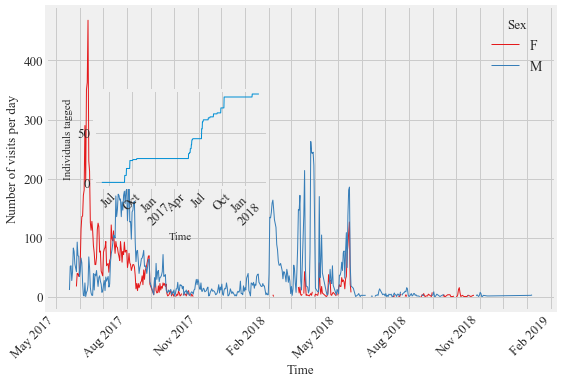

In [34]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
data.Sex.fillna('unknown', inplace= True)
alhu_data = data[data.Species == "ALHU"]
anhu_data = data[data.Species == "ANHU"]
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']+1
plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']

def plotvisits(timeunit, data, ax, c = ['#e41a1c', '#377eb8', '#4daf4a'], style = '-'):
    """timeunite: 10Min, D =  day, W = week, M = month"""
    if timeunit == '10Min':
        t = '10 minutes'
    elif timeunit == 'D':
        t = 'day'
    elif timeunit == 'W':
        t = 'week'
    if timeunit == 'M':
        t = 'month'
    a = data.groupby([ pd.Grouper(freq=timeunit), 'Sex'])['ID'].count().unstack('Sex')
    a.plot(kind="line", style = style, rot =45, ax= ax,stacked=False, color = c,)
    
    #set ticks every month
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    #set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    
    ## hiding every second month
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        if index % 3 != 0:
            label.set_visible(False)
    
    #ax.set_title('visits per '+t)
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of visits per day')

f, (ax1)  = plt.subplots(1, 1, figsize=(8,6))
plotvisits(timeunit= 'D', data = anhu_data, ax= ax1)


# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.175, 0.5, 0.3, 0.225]
ax2 = f.add_axes([left, bottom, width, height])

import matplotlib.dates as mdates
idx = pd.date_range('06.01.2016', '02.28.2018')
a = meta.groupby('Tagged Date')['Tag Hex'].nunique()
a.index = pd.DatetimeIndex(a.index)
a = a.reindex(idx, fill_value=0)
a.resample('D').cumsum().plot(kind="line", rot =45,ax = ax2)

ax2.set_ylabel('Individuals tagged', fontsize = 11)
ax2.set_xlabel('Time', fontsize = 11)



f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(output_path + '\Figure4.png', dpi = dpi)
plt.savefig(output_path + '\Figure4.eps',format = 'eps', dpi = dpi)
plt.show()

In [35]:
[item.get_text() for item in ax1.get_xticklabels()]

[u'May 2017',
 u'Jun 2017',
 u'Jul 2017',
 u'Aug 2017',
 u'Sep 2017',
 u'Oct 2017',
 u'Nov 2017',
 u'Dec 2017',
 u'Jan 2018',
 u'Feb 2018',
 u'Mar 2018',
 u'Apr 2018',
 u'May 2018',
 u'Jun 2018',
 u'Jul 2018',
 u'Aug 2018',
 u'Sep 2018',
 u'Oct 2018',
 u'Nov 2018',
 u'Dec 2018',
 u'Jan 2019',
 u'Feb 2019']

In [36]:
anhu_data.index

DatetimeIndex(['2017-06-07 08:23:59', '2017-05-20 16:03:09',
               '2017-06-19 19:27:38', '2018-05-16 14:12:59',
               '2018-05-16 14:13:12', '2018-05-16 14:25:25',
               '2018-05-16 15:07:13', '2018-05-16 15:08:13',
               '2018-05-16 15:19:54', '2018-05-16 15:20:48',
               ...
               '2018-04-08 13:49:58', '2018-03-09 13:27:38',
               '2018-04-08 18:35:40', '2018-03-09 14:32:24',
               '2018-04-08 21:06:48', '2018-03-09 15:44:31',
               '2018-04-08 23:04:56', '2018-03-09 16:03:23',
               '2018-02-02 15:32:11', '2018-02-03 13:19:10'],
              dtype='datetime64[ns]', name=u'visit_start', length=26972, freq=None)

In [37]:
data.shape

(26972, 16)

### Tagging activity Figure 5 Inset: The cumulative tagging effort throughout the study.

C:\Users\Falco\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.resample() is now a deferred operation
You called cumsum(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  # Remove the CWD from sys.path while we load stuff.


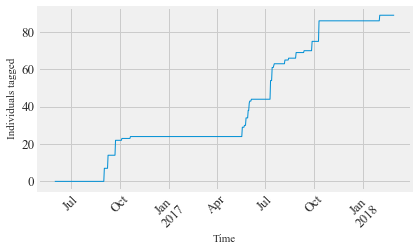

In [38]:
import matplotlib.dates as mdates
fig, ax1 = plt.subplots(1, figsize=(6,4))
idx = pd.date_range('06.01.2016', '02.28.2018')
a = meta.groupby('Tagged Date')['Tag Hex'].nunique()
a.index = pd.DatetimeIndex(a.index)
a = a.reindex(idx, fill_value=0)
#tl = a.cumsum()
#tl.columns = ['sampling']
#tl.plot.line(drawstyle = 'steps', label='Animals', rot =45,ax = ax1)
a.resample('D').cumsum().plot(kind="line", rot =45,ax = ax1)
#set ticks every month
#ax1.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

## hiding every second month
#for index, label in enumerate(ax1.xaxis.get_ticklabels()):
#    if index % 3 != 0:
#        label.set_visible(False)

ax1.set_ylabel('Individuals tagged', fontsize = 11)
ax1.set_xlabel('Time', fontsize = 11)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(output_path+'/'+'cumulative_tagging.png', dpi = dpi)
plt.savefig(output_path+'/'+'cumulative_tagging.eps',format = 'eps',  dpi = dpi)
plt.show()

# Figure 6:

### Comparison of the daily detections from the two different antennas at the double antenna feeding station  transceiver at Site 2 over time. The top antenna for this feeding station was deployed in May 2017 and discontinued in January 2018 for data collection. Overall, the total number of visits detected by the side antenna exceeded the number of visits for the top antenna but not enough to warrant the addition of a second antenna. Both antennas detected the presence of the same number of individual birds.

## Top reader
tag_dataA2 = HT.read_tag_files(data_path = data_path, select_readers = ['A2'], )
visit_dataA2 = HT.collapse_reads_10_seconds(data= tag_dataA2)
dataA2 = HT.merge_metadata(data = visit_dataA2, metadata = meta, for_paper = True)

## Side reader
tag_dataA4 = HT.read_tag_files(data_path = data_path, select_readers = ['A4'])
visit_dataA4 = HT.collapse_reads_10_seconds(data= tag_dataA4)
dataA4 = HT.merge_metadata(data = visit_dataA4, metadata = meta, for_paper = True)

dataA4 = dataA4.ix['2017-05-23':'2018-01-25']
dataA2 = dataA2.ix['2017-05-23':'2018-01-25']

print ('side antenna recorded ' +str(dataA4.shape[0]) + ' visits')

print ('top antenna recorded ' +str(dataA2.shape[0]) + ' visits')

print ('side antenna recorded ' +str(len(dataA4.ID.unique())) + ' PIT tagged birds')

print ('top antenna recorded ' +str(len(dataA2.ID.unique())) + ' PIT tagged birds')

# Figure 6

In [39]:
dpi = 1000

def plotvisits(timeunit, data, ax, c = ['#e41a1c', '#377eb8', '#4daf4a']):
           
        """timeunite: 10Min, D =  day, W = week, M = month"""
        if timeunit == '10Min':
            t = '10 minutes'
        elif timeunit == 'D':
            t = 'day'
        elif timeunit == 'W':
            t = 'week'
        if timeunit == 'M':
            t = 'month'
        data.groupby([ pd.Grouper(freq=timeunit)])['ID'].count().plot(kind="line", rot =45, ax= ax)
        
        #set ticks every month
        #ax.xaxis.set_major_locator(mdates.MonthLocator())
        #set major ticks format
        #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %B'))

        ## hiding every second month
        #for index, label in enumerate(ax.xaxis.get_ticklabels()):
        #    if index % 3 != 0:
        #        label.set_visible(False)

        #ax.set_title('visits per '+t)
        ax.set_xlabel('Time')
        ax.set_ylabel('Number of visits per day')

                
f, (ax1)  = plt.subplots(1, 1, figsize=(8,6))
plotvisits(timeunit= 'D', data= dataA4, ax= ax1)
plotvisits(timeunit= 'D', data= dataA2, ax= ax1)
labels = ['Jun 2017', 'Jul 2017', 'Aug 2017','Sep 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017', 'Jan 2018', 'Feb 2018']
ax1.set_xticklabels(labels)
#set ticks every month
#ax1.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y %B'))

## hiding every second month
#for index, label in enumerate(ax1.xaxis.get_ticklabels()):
#    if index % 3 != 0:
#        label.set_visible(False)
f.legend(['side antenna reader unit', 'top antenna reader unit'],loc = 'best')
#f.suptitle('Hummingbird visits to feeders', fontsize = 24)
f.tight_layout()#rect=[0, 0.03, 1, 0.95]
f.savefig(output_path+'/Figure 5.png', dpi = dpi)
f.savefig(output_path+'/'+'Figure 5.eps',format = 'eps',  dpi = dpi)
plt.show()

## Gender association with activity of bird visitation metrices

C:\Users\Falco\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


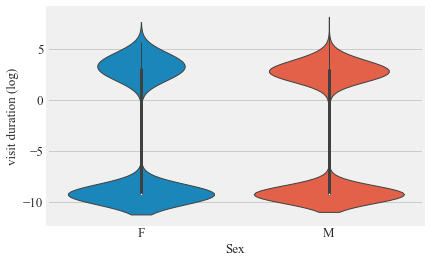

In [40]:
v = pd.merge(visit_data, meta, left_on='ID', right_on='Tag Hex', how='left')
sns.violinplot(v.Sex,np.log((v.visit_duration / np.timedelta64(1, 's')).astype(int)+0.0001))
plt.ylabel('visit duration (log)')
plt.show()

In [41]:
data.visit_duration.describe()

count                     26972
mean     0 days 00:00:13.135807
std      0 days 00:00:21.971902
min             0 days 00:00:00
25%             0 days 00:00:00
50%             0 days 00:00:00
75%             0 days 00:00:21
max             0 days 00:10:15
Name: visit_duration, dtype: object

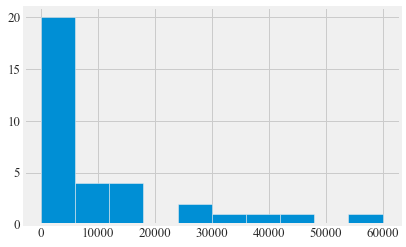

In [42]:
plt.hist(Bird_summary.duration_total)
plt.show()

In [43]:
Bird_summary.duration_total.describe()

count       34.000000
mean     10420.558824
std      14679.659535
min          0.000000
25%        285.500000
50%       4446.000000
75%      16131.750000
max      59922.000000
Name: duration_total, dtype: float64

# Short visits

In [44]:
v_s = v[v.visit_duration =='0 seconds']
v_s.shape

(14177, 14)

In [45]:
v_s.visit_duration.sum()

Timedelta('0 days 00:00:00')

## Long visits

In [46]:
v_d = v[v.visit_duration>'0 seconds']
v_d.shape

(12798, 14)

## Total time observed

In [47]:
v_d.visit_duration.sum()

Timedelta('4 days 02:26:47')

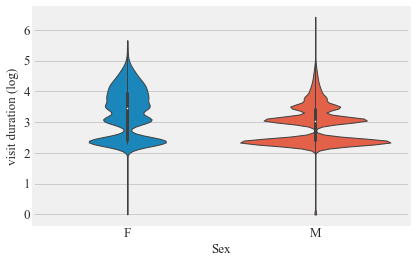

In [48]:
sns.violinplot(v_d.Sex,np.log((v_d.visit_duration / np.timedelta64(1, 's')).astype(int)+0.0001), cut=0)
plt.ylabel('visit duration (log)')
plt.show()

## difference in the visit duration males vs females

In [49]:
Bird_summary.Sex.unique()

array([u'F', u'M'], dtype=object)

In [50]:
v_d.head()

visit_start            visit_end              ID Tag  \
0   2017-06-07 08:23:59  2017-06-07 08:24:54  3D6.00184967A2  A4   
14  2017-06-12 11:40:18  2017-06-12 11:41:12  3D6.00184967A2  A5   
26  2017-06-12 11:41:24  2017-06-12 11:41:57  3D6.00184967A2  A5   
41  2017-06-12 13:16:10  2017-06-12 13:17:16  3D6.00184967A2  A5   
43  2017-06-12 14:25:54  2017-06-12 14:27:22  3D6.00184967A2  A5   

   visit_duration  SrNo.         Tag Hex     Tag Dec Species  Age Sex  \
0        00:00:55    1.0  3D6.00184967A2  982.000407    ANHU  AHY   F   
14       00:00:54    1.0  3D6.00184967A2  982.000407    ANHU  AHY   F   
26       00:00:33    1.0  3D6.00184967A2  982.000407    ANHU  AHY   F   
41       00:01:06    1.0  3D6.00184967A2  982.000407    ANHU  AHY   F   
43       00:01:28    1.0  3D6.00184967A2  982.000407    ANHU  AHY   F   

   Tagged Date   Location Location Id  
0   2017-05-19  Arboretum    Arbo -1   
14  2017-05-19  Arboretum    Arbo -1   
26  2017-05-19  Arboretum    Arbo -1   
41  2017-05-19  Arboretum    Arbo -1   
43  2017-05-19  Arboretum    Arbo -1

In [51]:
v_d['visit_duration_seconds'] = v_d['visit_duration'].dt.total_seconds()
trial = v_d.groupby(['ID', 'Sex']).visit_duration_seconds.mean()
trial = pd.DataFrame(trial)
trial.columns = ['duration_mean']
trial.reset_index(inplace= True)
trial.head()

C:\Users\Falco\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


ID Sex  duration_mean
0  3D6.00184967A2   F      37.080679
1  3D6.00184967A4   M      27.347024
2  3D6.00184967A6   M      24.608108
3  3D6.00184967A7   F      21.530667
4  3D6.00184967A8   M      17.068966

In [52]:
m_v_d1 = trial[trial.Sex== 'M']
m_v_d = m_v_d1.duration_mean #/ np.timedelta64(1, 's')
f_v_d1 = trial[trial.Sex== 'F']
f_v_d = f_v_d1.duration_mean #/ np.timedelta64(1, 's')

In [53]:
print (np.mean(f_v_d), np.std(f_v_d), len(f_v_d) )

(33.4609255648682, 10.332078328482536, 9)


In [54]:
print (np.mean(m_v_d), np.std(m_v_d), len(m_v_d) )

(23.28770222232806, 6.16524438992856, 19)


In [55]:
stats.kruskal(m_v_d, f_v_d)

KruskalResult(statistic=4.578947368421055, pvalue=0.03236709220632556)

##### Comparison of median

In [56]:
stats.median_test(f_v_d, m_v_d)

(0.6549707602339181, 0.4183410891002267, 23.168658069715896, array([[ 6,  8],
        [ 3, 11]], dtype=int64))

In [57]:
print 'male median visit time '+ str( np.median(m_v_d))
print 'female median visit time '+ str( np.median(f_v_d))

male median visit time 22.0
female median visit time 35.18181818181818


In [58]:
print 'male mean visit time '+ str( np.mean(m_v_d))
print 'female means visit time '+ str( np.mean(f_v_d))

male mean visit time 23.2877022223
female means visit time 33.4609255649


In [59]:
print 'male std visit time '+ str( np.std(m_v_d))
print 'female std visit time '+ str( np.std(f_v_d))

male std visit time 6.16524438993
female std visit time 10.3320783285


In [60]:
print 'male std visit time '+ str( m_v_d.shape)
print 'female std visit time '+ str( f_v_d.shape)

male std visit time (19L,)
female std visit time (9L,)


### Proportoin of time present

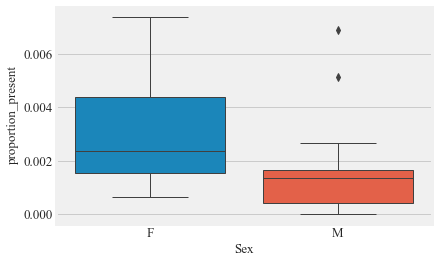

In [61]:
Bird_summary['proportion_present'] = Bird_summary.duration_total/(Bird_summary.date_u*86400)
Bird_summary['proportion_present'].describe()
sns.boxplot(Bird_summary.Sex,Bird_summary.proportion_present)
plt.show()

In [62]:
m_pt = Bird_summary[Bird_summary.Sex== 'M']
f_pt = Bird_summary[Bird_summary.Sex== 'F']
stats.mannwhitneyu(m_pt.proportion_present, f_pt.proportion_present)

MannwhitneyuResult(statistic=52.0, pvalue=0.009425919080710304)

In [63]:
m_pt.proportion_present.describe()

count    25.000000
mean      0.001447
std       0.001597
min       0.000000
25%       0.000424
50%       0.001351
75%       0.001645
max       0.006894
Name: proportion_present, dtype: float64

In [64]:
f_pt.proportion_present.describe()

count    9.000000
mean     0.003362
std      0.002438
min      0.000651
25%      0.001555
50%      0.002379
75%      0.004373
max      0.007378
Name: proportion_present, dtype: float64

In [65]:
Bird_summary.proportion_present.describe()

count    34.000000
mean      0.001954
std       0.002007
min       0.000000
25%       0.000702
50%       0.001510
75%       0.002155
max       0.007378
Name: proportion_present, dtype: float64

# Diel activity of Humminbirds

# Figure 7:

### Diel plots of mean hourly hummingbird visits to the feeding stations at three sites at northern and southern California from September 2016 to March 2018. The bar denotes the mean hourly visits by hummingbirds and black lines show the standard error. All distributions were statistically non-uniform (probability values reported by season).

C:\Users\Falco\Anaconda2\lib\site-packages\matplotlib\projections\polar.py:67: RuntimeWarning: invalid value encountered in less
  mask = r < 0


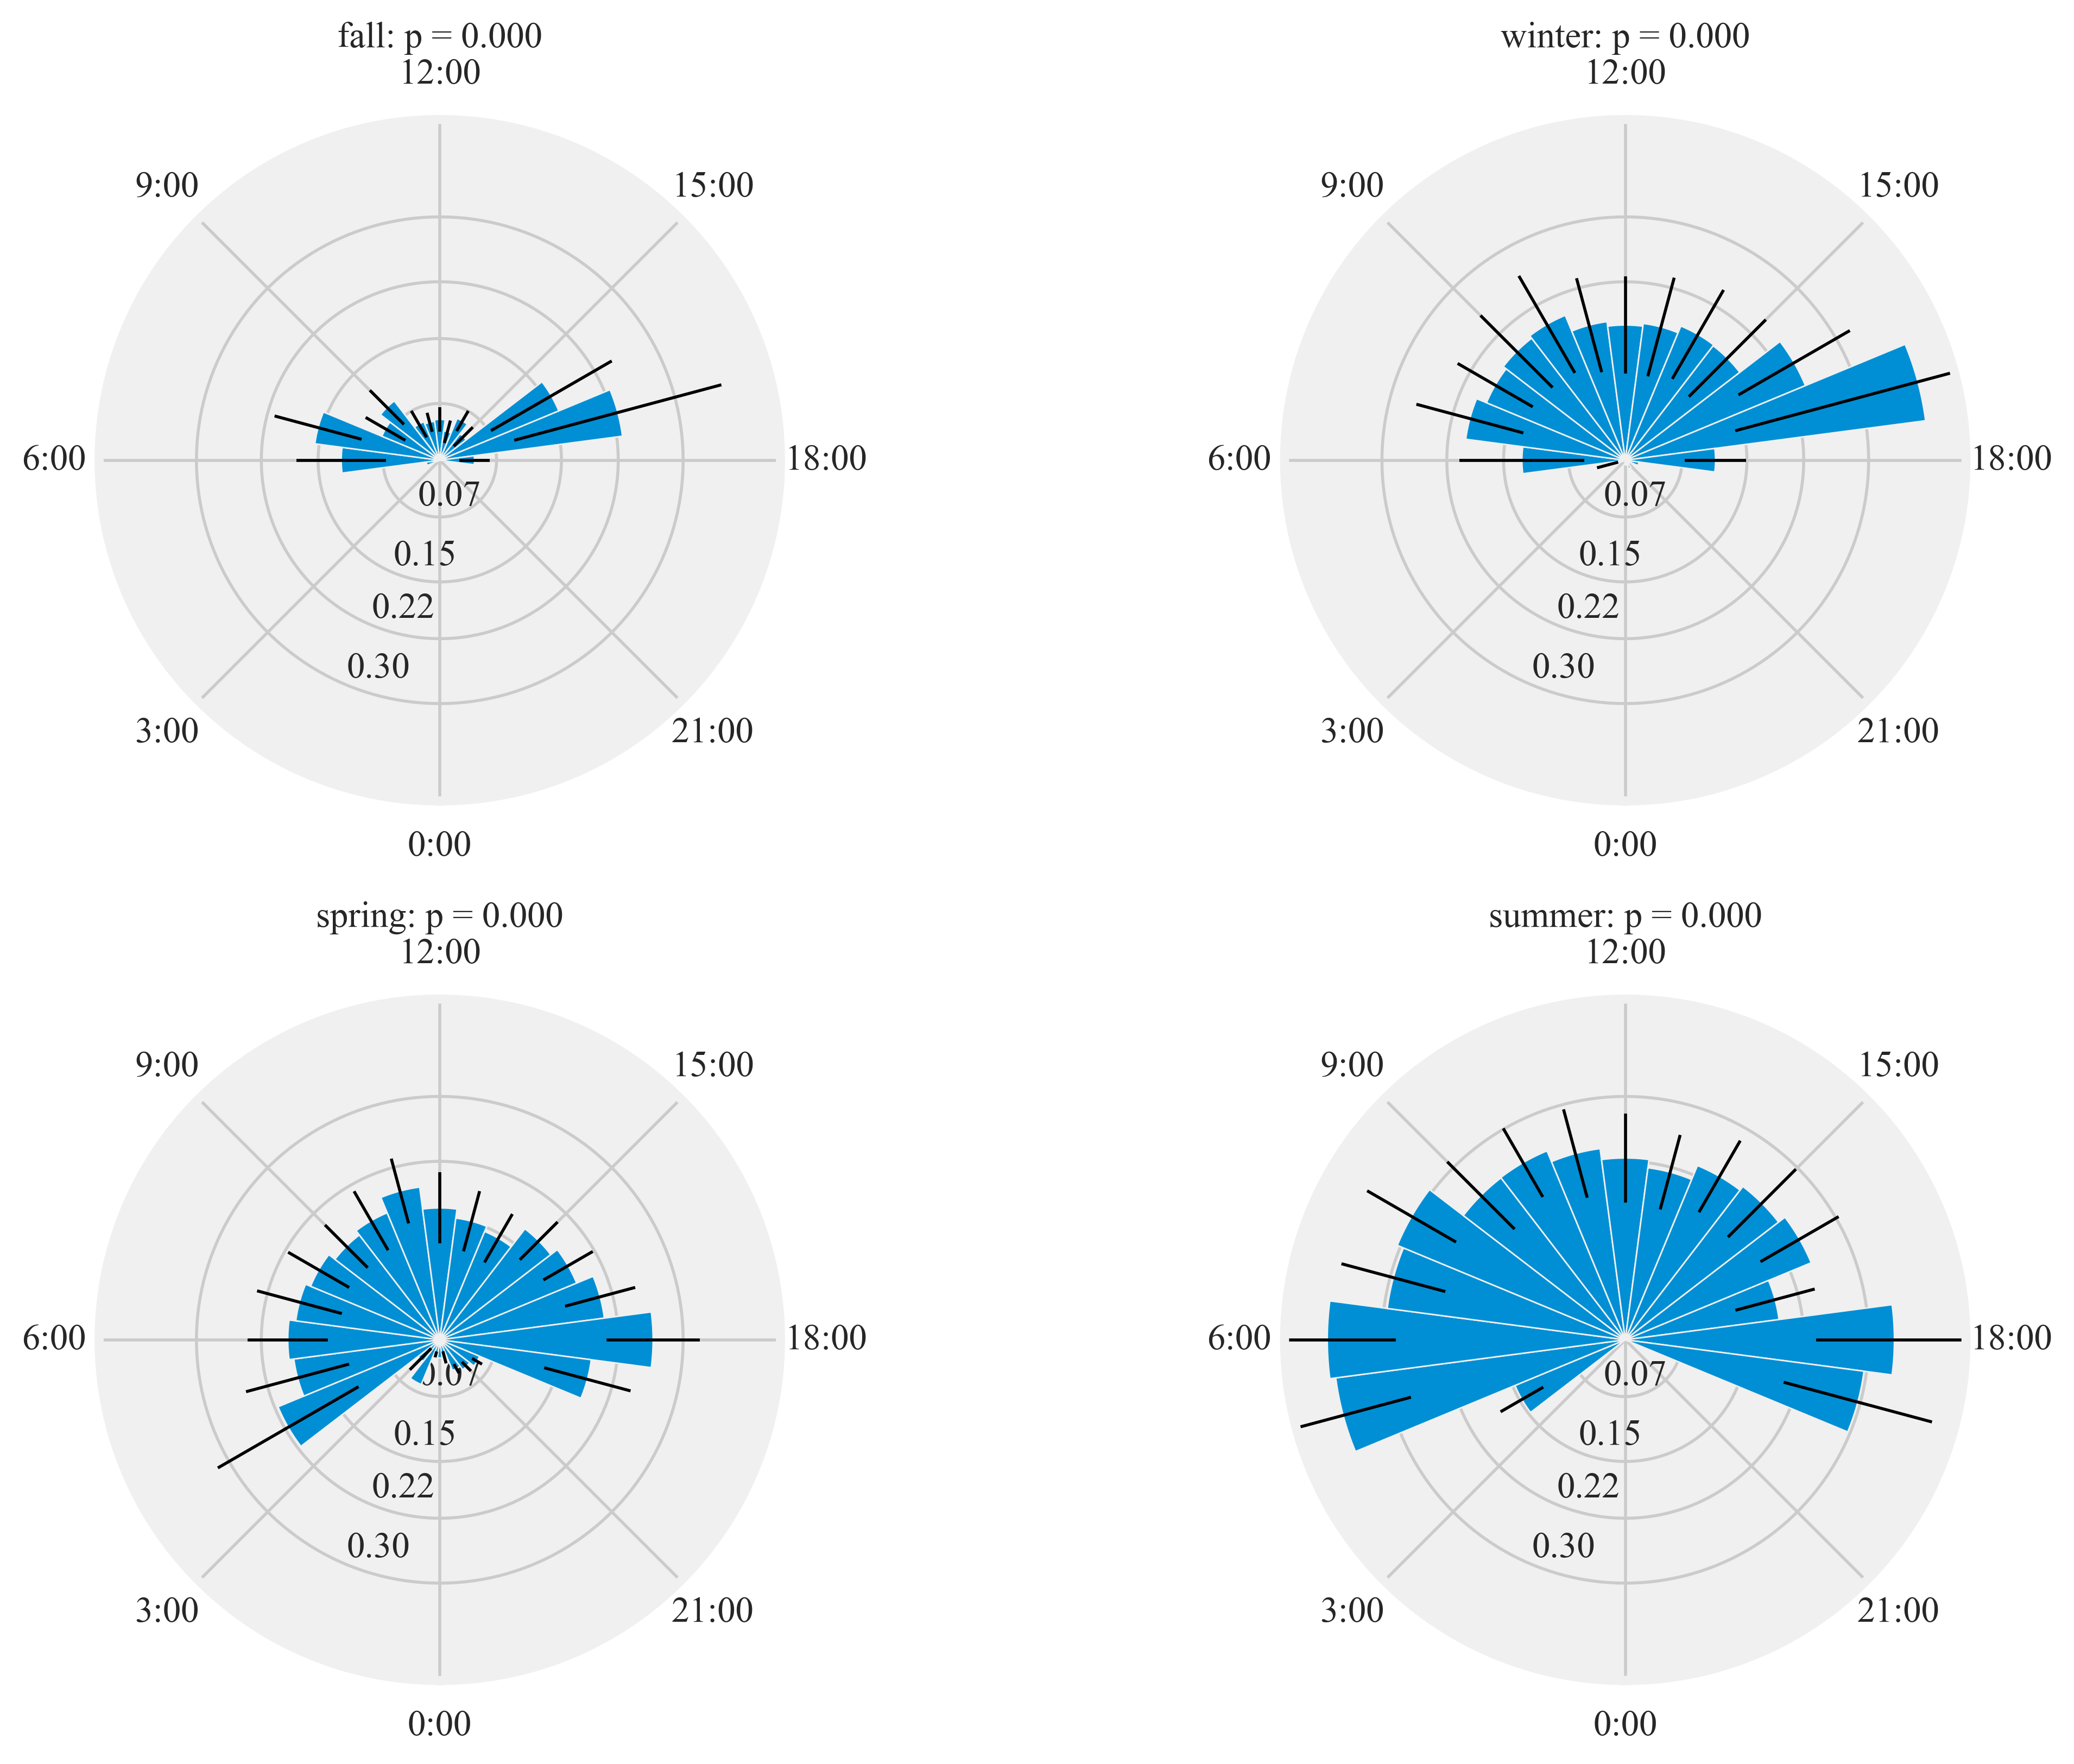

Rayleigh test identify a non-uniform distribution, i.e. it is
designed for detecting an unimodal deviation from uniformity
winter: p =  0.000
spring: p =  0.000
summer: p =  0.000
fall: p =  0.000
Wall time: 15.2 s


In [66]:
%%time
plt.rcParams['xtick.major.pad']='8'
HT.diurnal_variation(dataframe = data, output_path = output_path, species = 'all', sex = 'both', rlim = 1)

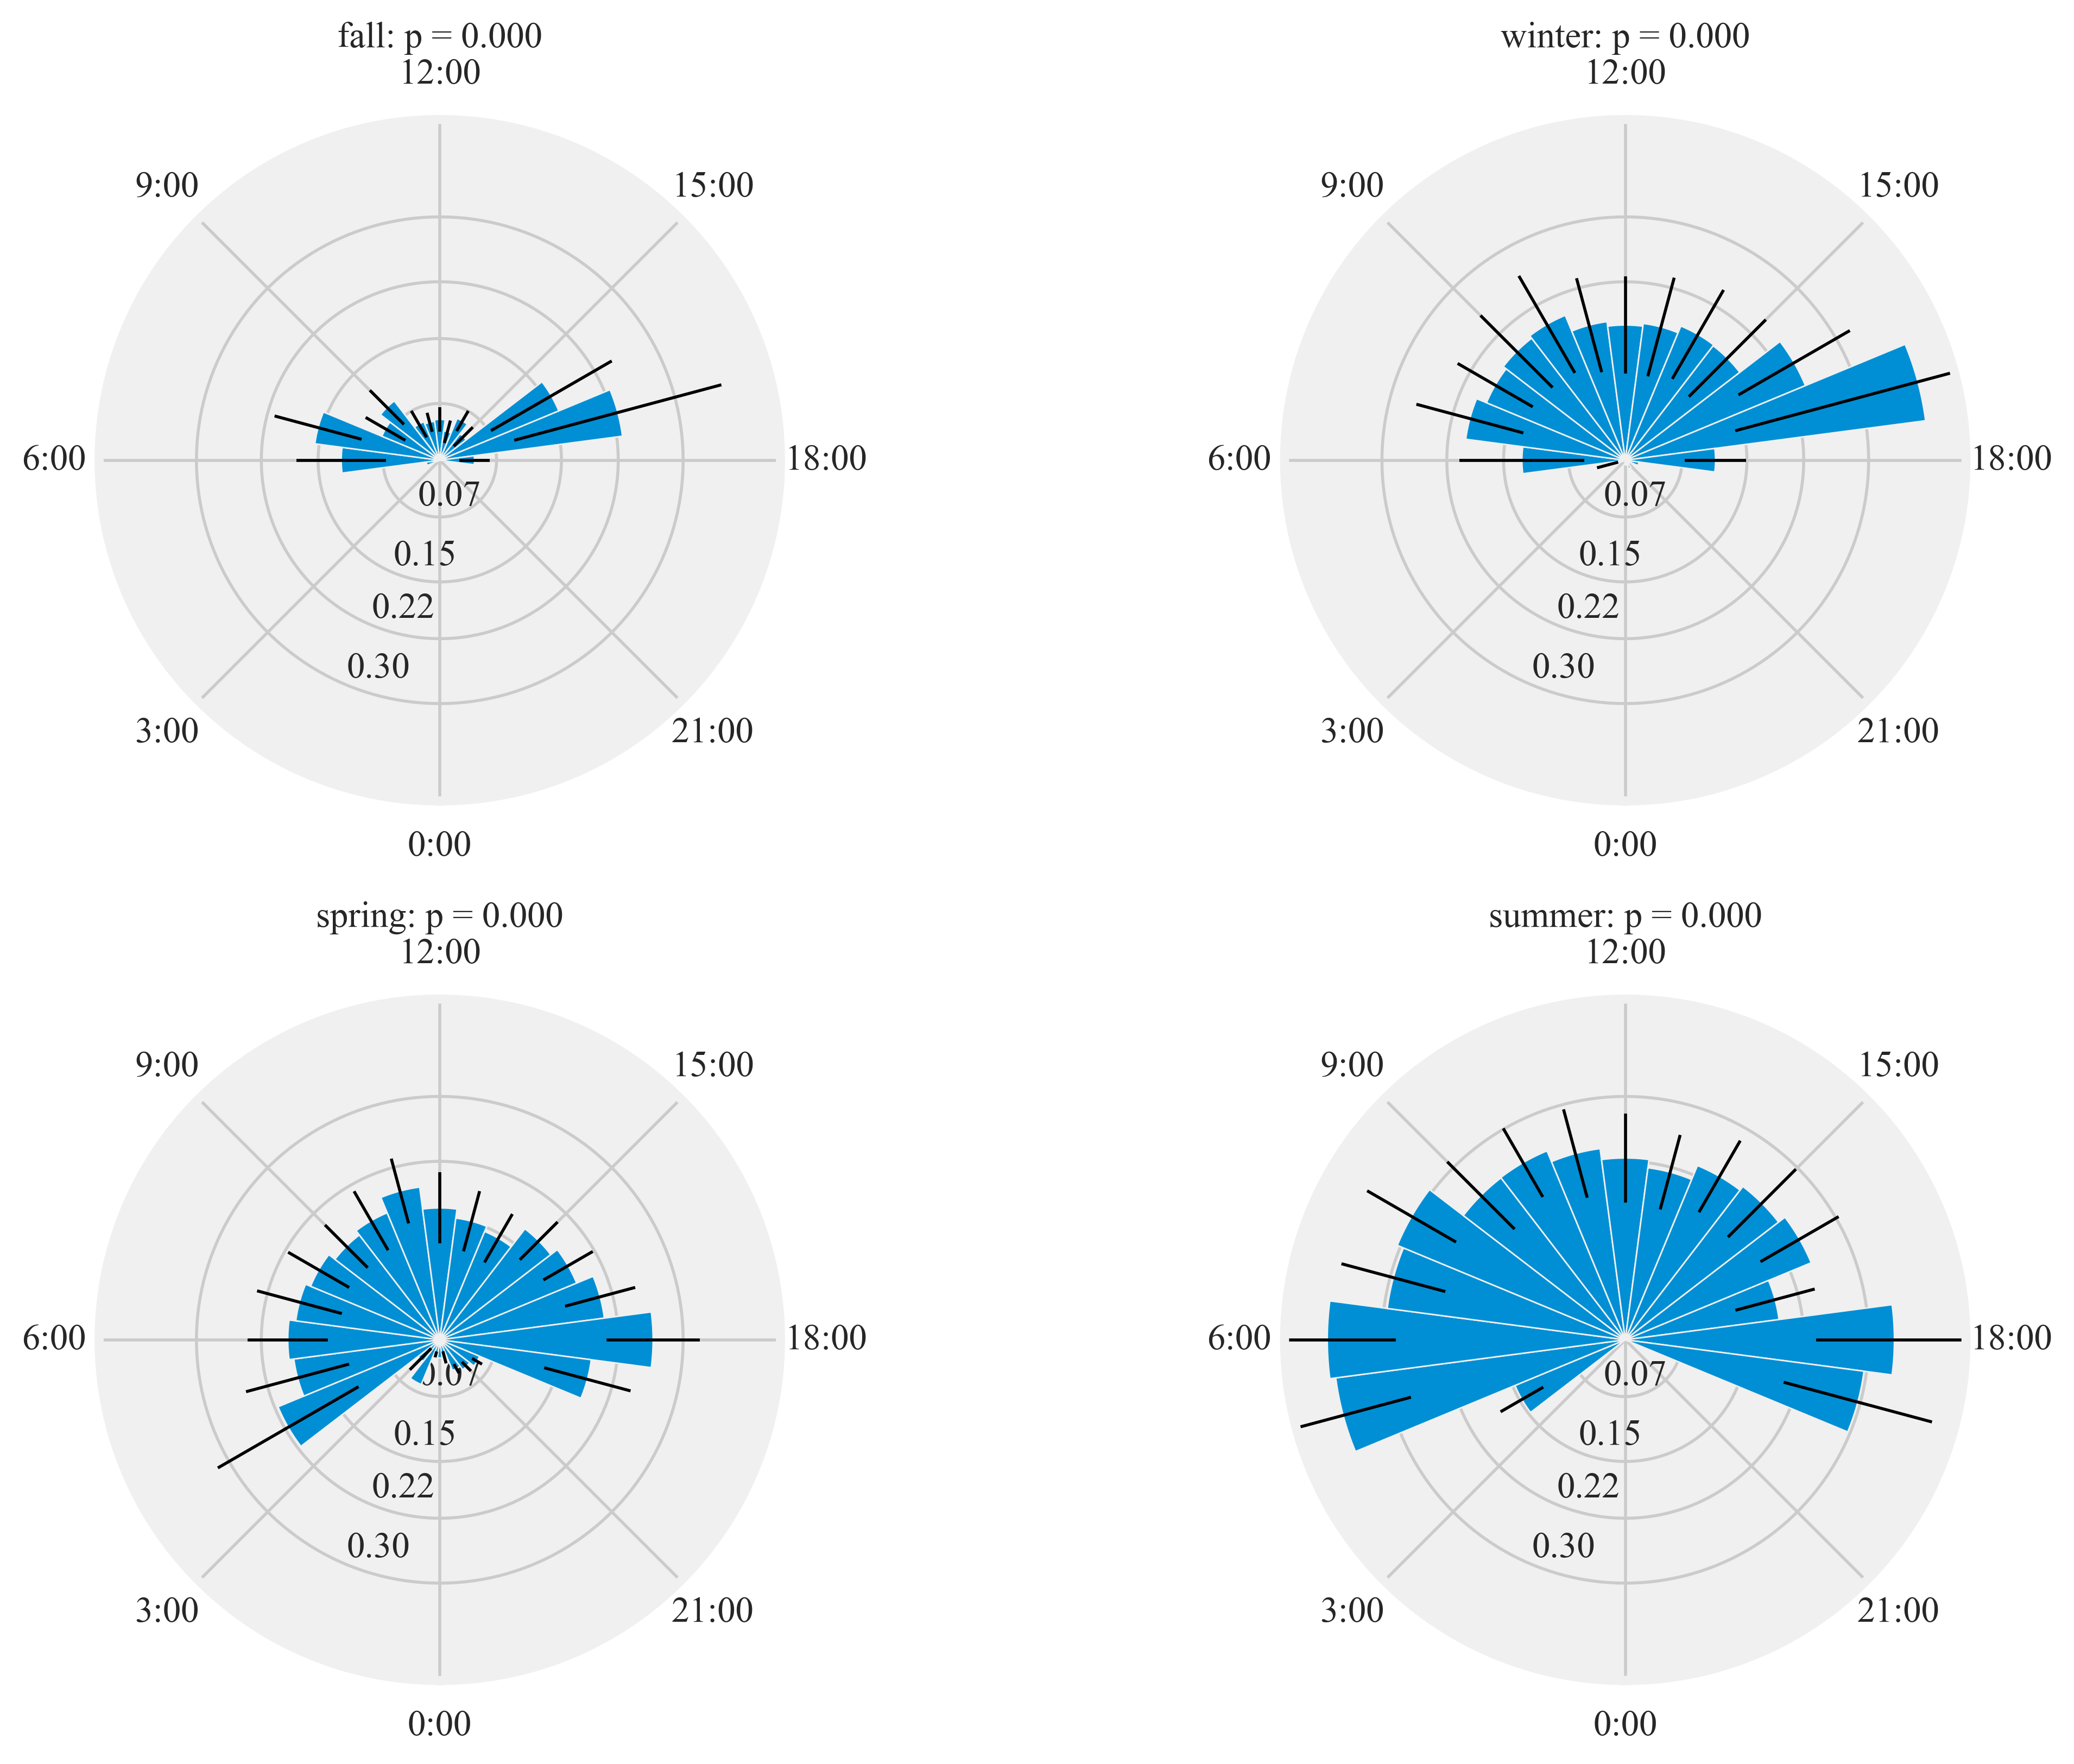

Rayleigh test identify a non-uniform distribution, i.e. it is
designed for detecting an unimodal deviation from uniformity
winter: p =  0.000
spring: p =  0.000
summer: p =  0.000
fall: p =  0.000
Wall time: 15.6 s


In [67]:
%%time
plt.rcParams['xtick.major.pad']='8'
HT.diurnal_variation(dataframe = data, output_path = output_path, species = 'ANHU', sex = 'both', rlim = 1)

In [68]:
data[data.Sex =='M'].visit_start.max().date()

datetime.date(2019, 1, 7)

In [69]:
data[data.Species =='ANHU'].visit_start.max().date()

datetime.date(2019, 1, 7)

In [70]:
data[data.Sex =='M'].Date.max()

datetime.date(2019, 1, 7)

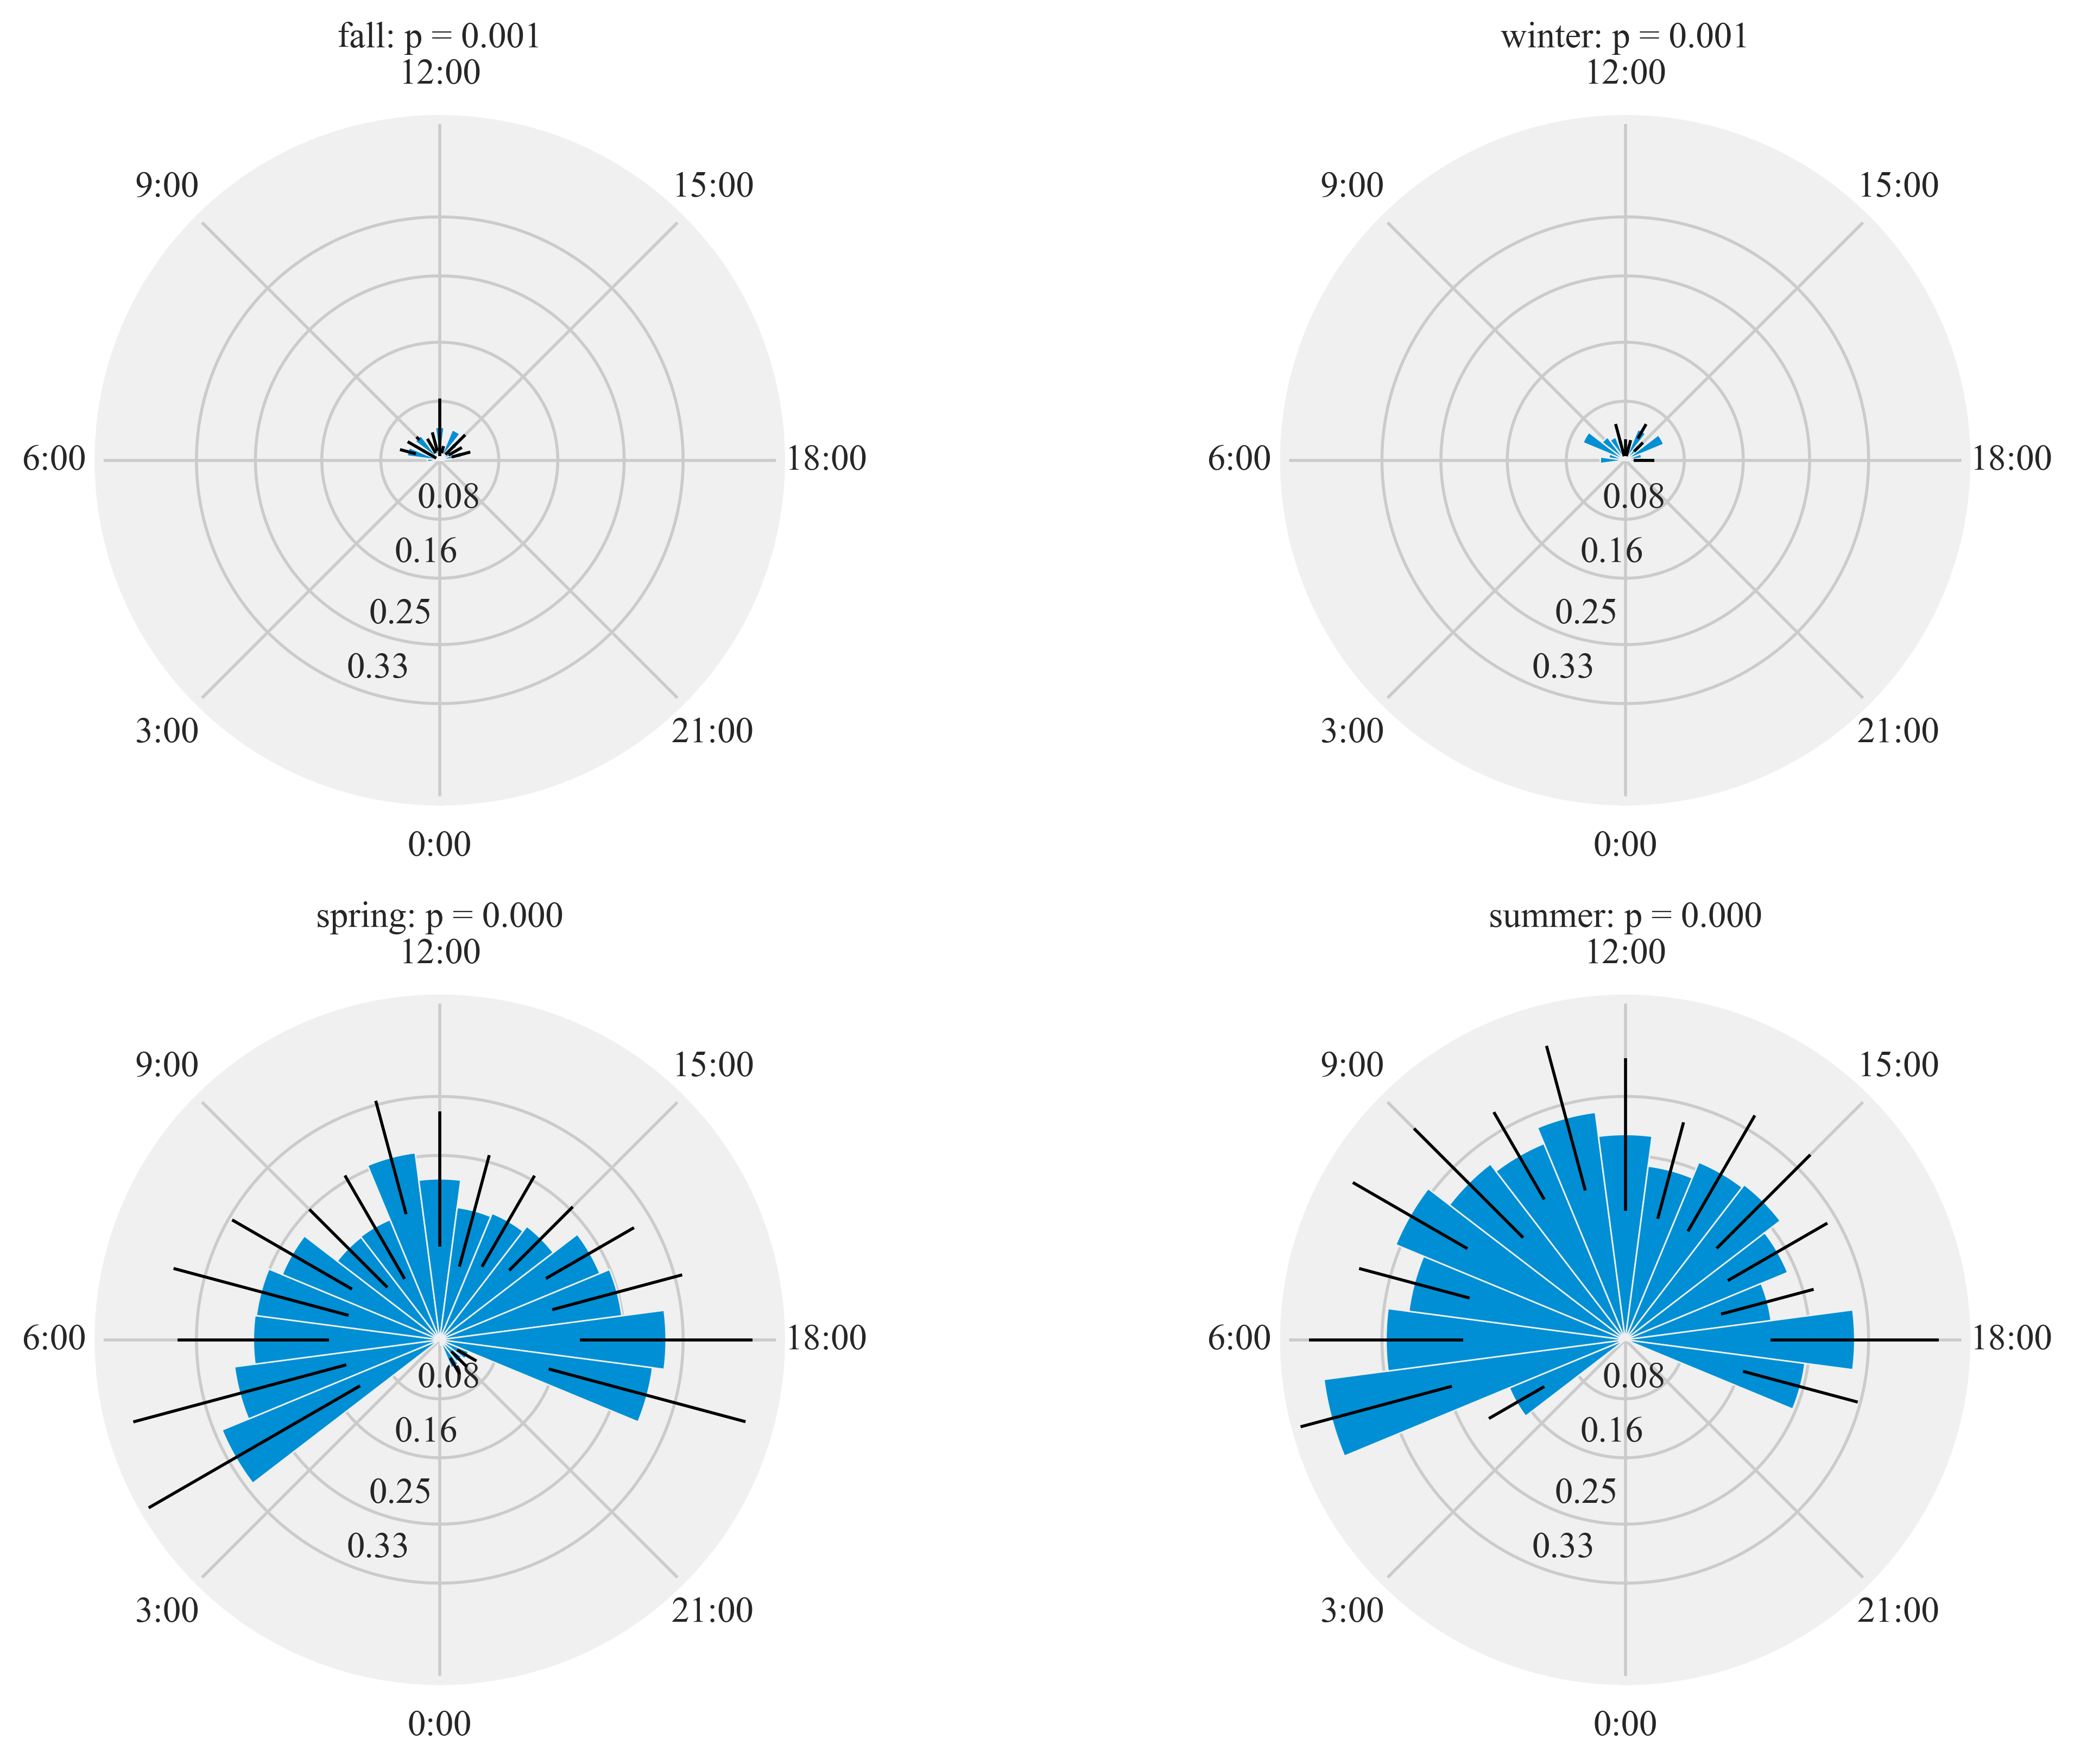

Rayleigh test identify a non-uniform distribution, i.e. it is
designed for detecting an unimodal deviation from uniformity
winter: p =  0.001
spring: p =  0.000
summer: p =  0.000
fall: p =  0.001
Wall time: 12.5 s


In [71]:
%%time
plt.rcParams['xtick.major.pad']='8'
HT.diurnal_variation(dataframe = data, output_path = output_path, species = 'ANHU', sex = 'F', rlim = 1)

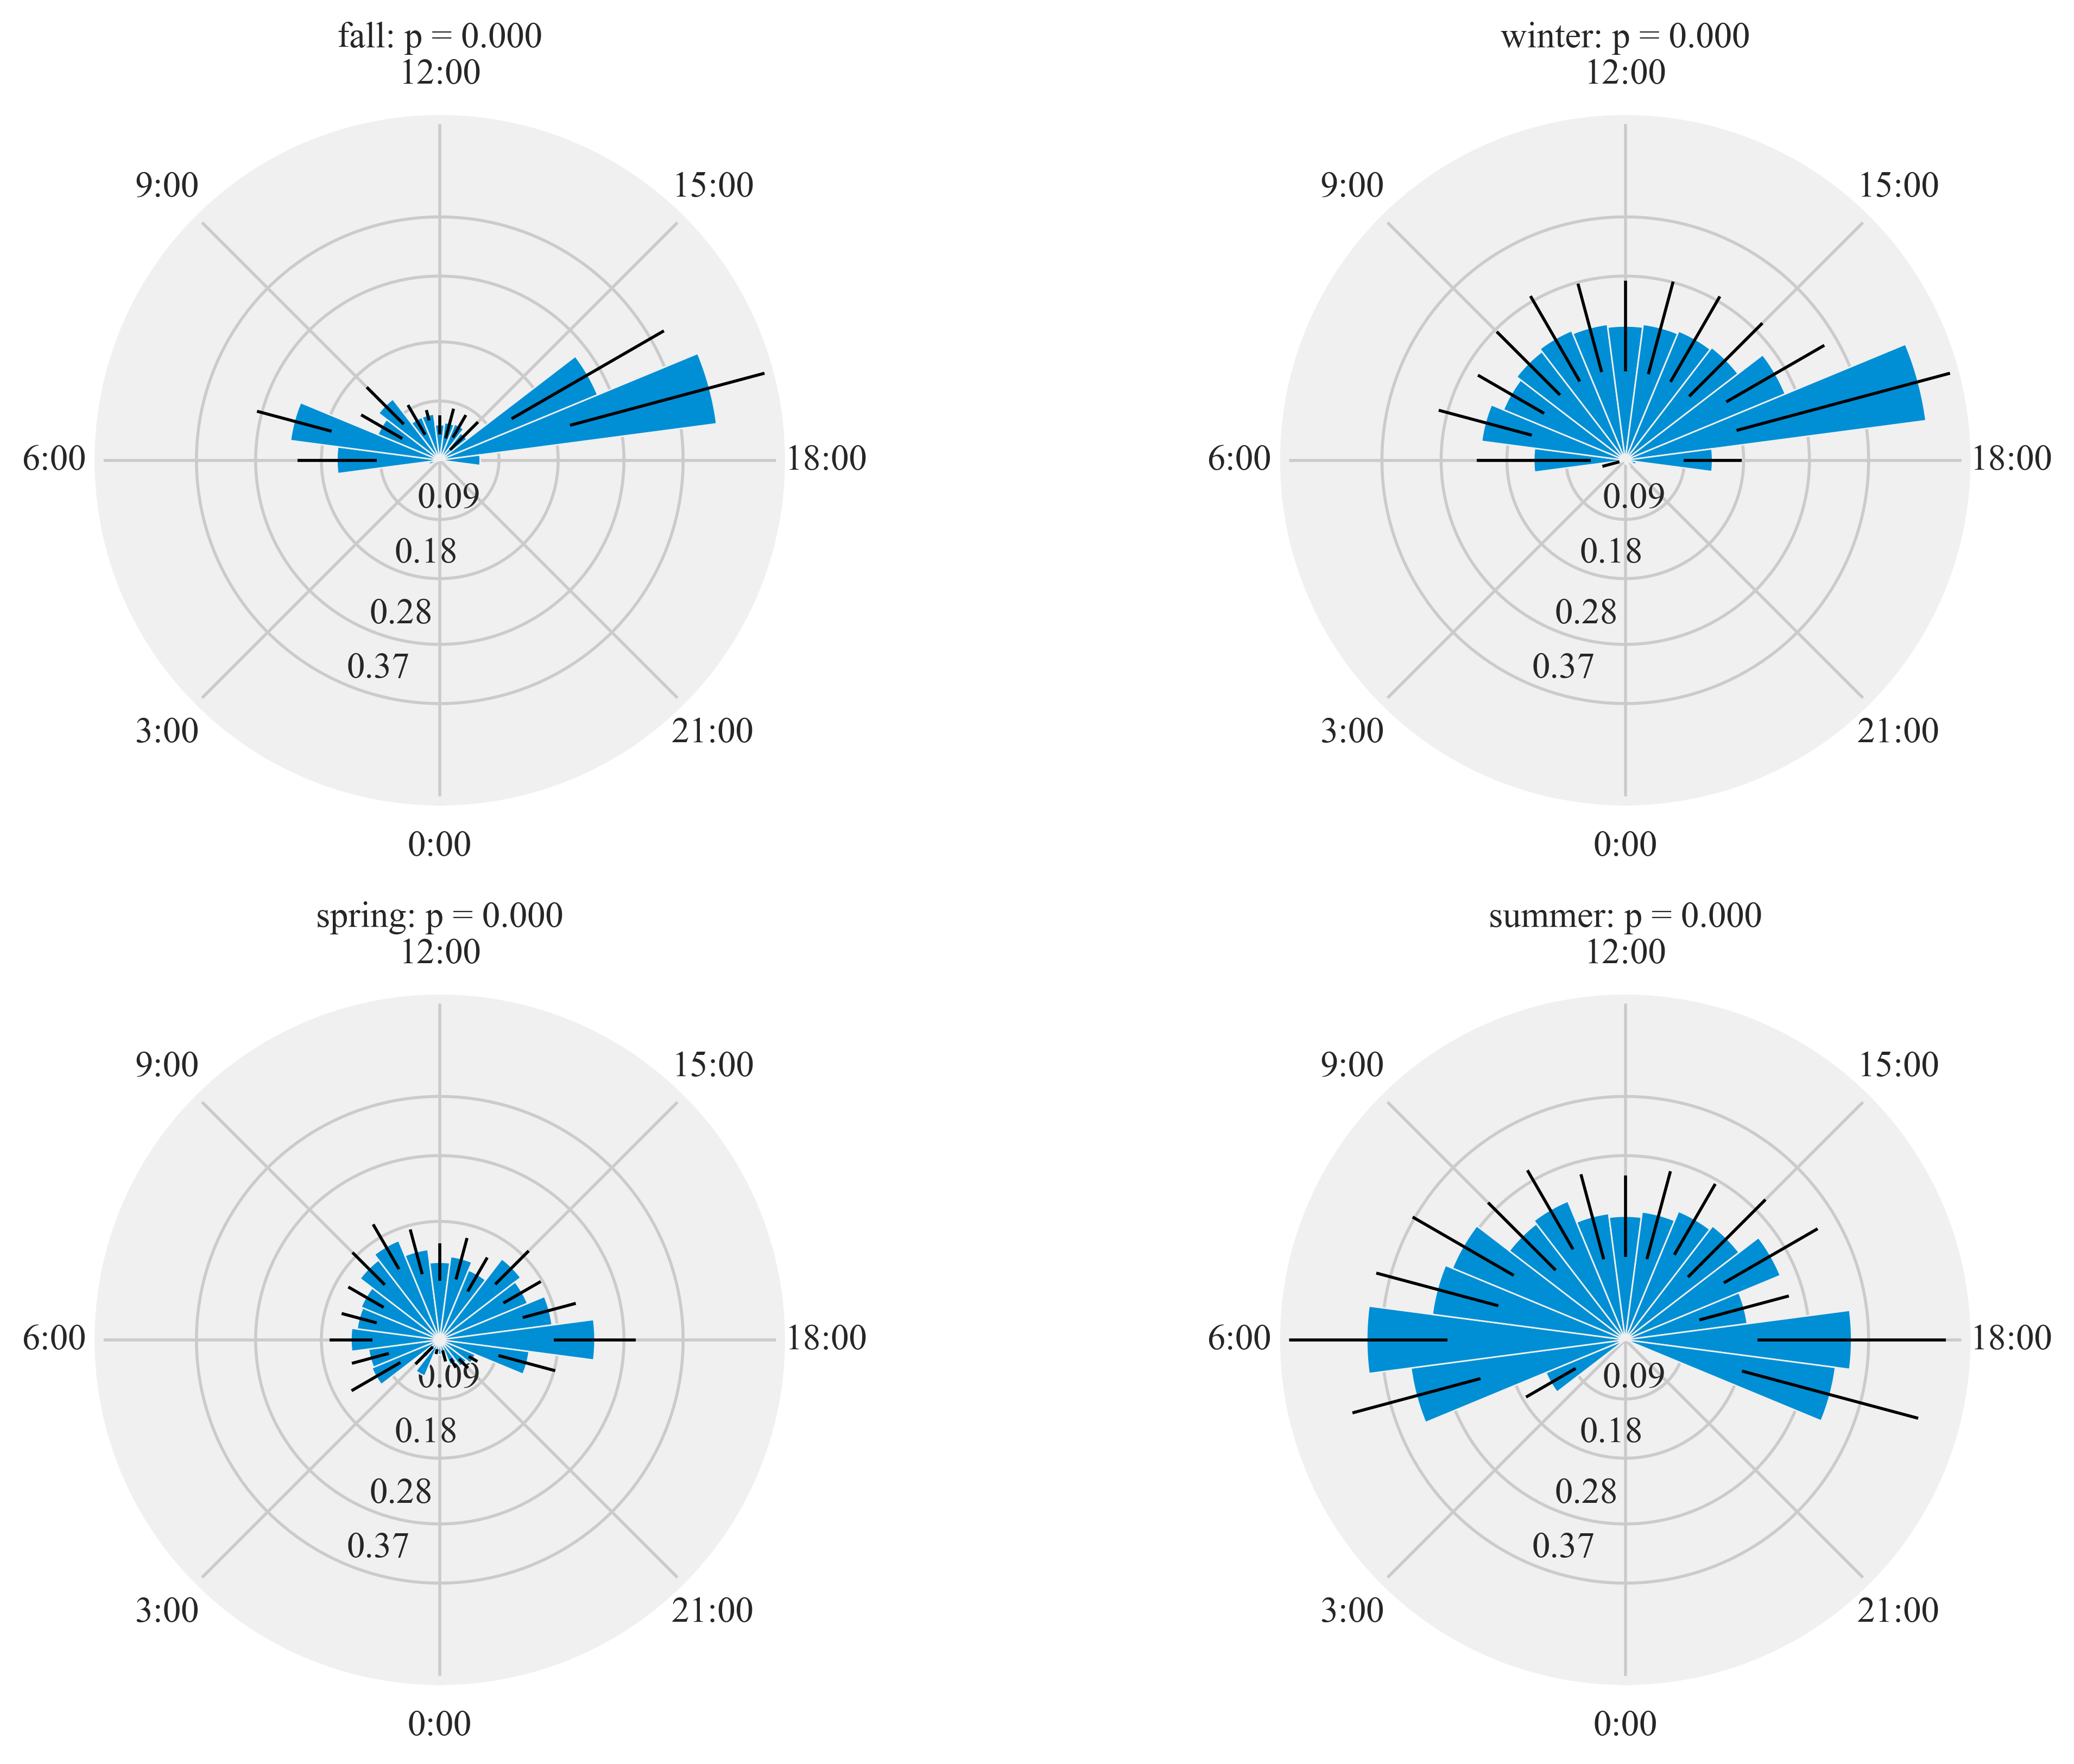

Rayleigh test identify a non-uniform distribution, i.e. it is
designed for detecting an unimodal deviation from uniformity
winter: p =  0.000
spring: p =  0.000
summer: p =  0.000
fall: p =  0.000
Wall time: 14.1 s


In [72]:
%%time
plt.rcParams['xtick.major.pad']='8'
HT.diurnal_variation(dataframe = data, output_path = output_path, species = 'ANHU', sex = 'M', rlim = 1)

In [73]:
%%time
plt.rcParams['xtick.major.pad']='8'
HT.diurnal_variation(dataframe = data, output_path = output_path, species = 'ALHU', sex = 'both', rlim = 0.1)

ValueError: NaTType does not support time

In [74]:
%%time
plt.rcParams['xtick.major.pad']='8'
HT.diurnal_variation(dataframe = data, output_path = output_path, species = 'ALHU', sex = 'M', rlim = 0.1)

ValueError: NaTType does not support time

In [75]:
%%time
plt.rcParams['xtick.major.pad']='8'
HT.diurnal_variation(dataframe = data, output_path = output_path, species = 'ALHU', sex = 'F', rlim = 0.1)

ValueError: NaTType does not support time

### bird_summaries

This function:

1. calculates summaries for each tagged bird
2. save a csv file with summary output
3. columns are 

Tag Hex,Species,Sex, Age, tagged_date, first_obs_aft_tag, date_min, date_max, obser_period, date_u, Location

# Night time activity

## Birds that showed activity between 10 PM to 4 AM 

In [76]:
visit_data.set_index(pd.DatetimeIndex(visit_data['visit_start']), inplace= True)
import datetime
start = datetime.time(22,0,0)
end = datetime.time(4,0,0)
visit_data.between_time(start, end).ID.unique().tolist()

['3D6.00184967A2',
 '3D6.00184967A4',
 '3D6.00184967A7',
 '3D6.00184967AD',
 '3D6.00184967AF',
 '3D6.00184967B8',
 '3D6.00184967BC',
 '3D6.00184967BF',
 '3D6.00184967E7',
 '3D6.00184967F8',
 '3D6.1D593D787F']

### number of visits in night by birds

In [77]:
import numpy as np
n = visit_data.between_time(start, end)
n['date']= n.index.date
n.groupby(['ID', 'date']).visit_start.count()

C:\Users\Falco\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ID              date      
3D6.00184967A2  2018-04-07     9
3D6.00184967A4  2018-01-04     3
                2018-01-06     1
                2018-04-07     1
                2018-04-10     2
3D6.00184967A7  2017-06-19     1
3D6.00184967AD  2017-05-22     2
                2017-05-23    11
                2017-05-24     7
                2017-05-25     4
                2018-04-07     2
3D6.00184967AF  2017-05-23     2
                2017-05-24     3
                2017-05-25     1
                2018-01-05     3
                2018-01-06     1
                2018-04-07     4
                2018-04-09     4
                2018-04-10     3
                2018-04-11     1
3D6.00184967B8  2018-04-06     1
                2018-04-07     3
                2018-04-09     1
                2018-04-10     2
3D6.00184967BC  2017-06-19     1
3D6.00184967BF  2018-01-04     1
                2018-04-09    12
                2018-04-10     3
3D6.00184967E7  2018-04-07     4
                

In [78]:
n.describe()

visit_duration
count                     107
mean   0 days 00:00:12.850467
std    0 days 00:00:23.900660
min           0 days 00:00:00
25%           0 days 00:00:00
50%           0 days 00:00:00
75%           0 days 00:00:16
max           0 days 00:02:01

In [79]:
date_format='%H:%M:%S'

## Time spent at the feeder in a night

In [80]:
n.groupby(['ID', 'date']).visit_duration.sum()

ID              date      
3D6.00184967A2  2018-04-07   00:00:00
3D6.00184967A4  2018-01-04   00:01:27
                2018-01-06   00:00:00
                2018-04-07   00:00:11
                2018-04-10   00:00:55
3D6.00184967A7  2017-06-19   00:00:43
3D6.00184967AD  2017-05-22   00:00:00
                2017-05-23   00:00:00
                2017-05-24   00:00:00
                2017-05-25   00:00:00
                2018-04-07   00:00:00
3D6.00184967AF  2017-05-23   00:00:00
                2017-05-24   00:00:00
                2017-05-25   00:00:00
                2018-01-05   00:01:14
                2018-01-06   00:00:00
                2018-04-07   00:00:11
                2018-04-09   00:00:33
                2018-04-10   00:00:44
                2018-04-11   00:00:11
3D6.00184967B8  2018-04-06   00:02:01
                2018-04-07   00:01:39
                2018-04-09   00:00:54
                2018-04-10   00:01:50
3D6.00184967BC  2017-06-19   00:01:05
3D6.00184967BF  2018-01

## feeders used in night

In [81]:
n.groupby(['ID', 'date'])['Tag'].unique()

ID              date      
3D6.00184967A2  2018-04-07    [A4]
3D6.00184967A4  2018-01-04    [A4]
                2018-01-06    [A4]
                2018-04-07    [A4]
                2018-04-10    [A4]
3D6.00184967A7  2017-06-19    [A4]
3D6.00184967AD  2017-05-22    [A4]
                2017-05-23    [A4]
                2017-05-24    [A4]
                2017-05-25    [A4]
                2018-04-07    [A4]
3D6.00184967AF  2017-05-23    [A4]
                2017-05-24    [A4]
                2017-05-25    [A4]
                2018-01-05    [A4]
                2018-01-06    [A4]
                2018-04-07    [A4]
                2018-04-09    [A4]
                2018-04-10    [A4]
                2018-04-11    [A4]
3D6.00184967B8  2018-04-06    [A4]
                2018-04-07    [A4]
                2018-04-09    [A4]
                2018-04-10    [A4]
3D6.00184967BC  2017-06-19    [A4]
3D6.00184967BF  2018-01-04    [A4]
                2018-04-09    [A4]
                2018-04-10  

In [82]:
from matplotlib import dates as dates 
import datetime as datetime
from matplotlib.ticker import MaxNLocator

# Figure 8:

### Activity of an after hatch year male Anna’s hummingbird with a subcutaneously placed PIT at Site 2 between May 22nd and May 26th 2017. This bird was detected at the feeder after sunset, evident in the peaks of hourly visits during the night (green shaded sections of plot).

f, (ax1)  = plt.subplots(1, 1, figsize=(8,6))
HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967AD', 
              start = '2017-05-22', 
              end ='2017-05-26',Bird_summary_data= Bird_summary,  ax = ax1)

#f.suptitle('Hummingbird visits to feeders', fontsize = 24)
f.tight_layout()#rect=[0, 0.03, 1, 0.95]
f.savefig(output_path+'/Figure 7.png', dpi = dpi)
f.savefig(output_path+'/Figure 7.eps',format = 'eps',  dpi=dpi)
plt.show()

# Figure S1:

### Activity of PIT tagged Anna’s Hummingbirds (Calypte anna) detected between 10 PM to 4 AM for the study period (September 2016- March 2018).  This nocturnal activity was only seen at study site 2 in northern California. The shaded portion represents night time. Days preceding and succeeding the night 

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6), (ax7,ax8,ax9))  = plt.subplots(nrows = 3, ncols = 3, figsize = (11,11))

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967A4', 
              start = '2018-01-04', 
              end ='2018-01-07',Bird_summary_data= Bird_summary,  ax = ax1, title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967A7', 
              start = '2017-06-18', 
              end ='2017-06-20',Bird_summary_data= Bird_summary,  ax = ax2,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967AD', 
              start = '2017-05-22', 
              end ='2017-05-26',Bird_summary_data= Bird_summary,  ax = ax3,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967AF', 
              start = '2017-05-22', 
              end ='2017-05-26',Bird_summary_data= Bird_summary,  ax = ax4,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967AF', 
              start = '2018-01-05', 
              end ='2018-01-07',Bird_summary_data= Bird_summary,  ax = ax5,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967BC', 
              start = '2017-06-18', 
              end ='2017-06-20',Bird_summary_data= Bird_summary,  ax = ax6,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967BF', 
              start = '2018-01-04', 
              end ='2018-01-06',Bird_summary_data= Bird_summary,  ax = ax7,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.00184967BF', 
              start = '2018-02-09', 
              end ='2018-02-11',Bird_summary_data= Bird_summary,  ax = ax8,title = True)

HT.plotBirdnight(data = visit_data, bird_ID='3D6.1D593D7848', 
              start = '2018-02-12', 
              end ='2018-02-14',Bird_summary_data= Bird_summary,  ax = ax9,title = True)


plt.tight_layout()
plt.savefig(output_path+'/Figure S1.png',  dpi=250)
plt.savefig(output_path+'/Figure S1.eps',format = 'eps',  dpi=250)
plt.savefig(output_path+'/Figure S1.jpg',  dpi=250)
plt.show()

# Feeder preference

# Figure 9:

### The preference of individual Anna’s and Allen’s Hummingbirds for the primary, secondary, and tertiary feeders in Site 2 in Northern California. Solid circles show the data points.

In [83]:
reader_predilection.columns =reader_predilection.columns.get_level_values(0)
reader_predilection.head()

Tag               A4   A5    A8  B4
ID                                 
3D6.00184967A2  1031  316    47   0
3D6.00184967A4  1099  646  1504  87
3D6.00184967A6   460    4     6   0
3D6.00184967A7  2009    8    98   0
3D6.00184967A8   123  143     0   0

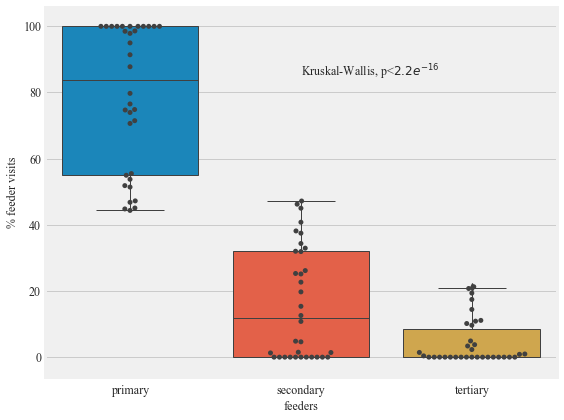

In [84]:
reader_predilection.columns =reader_predilection.columns.get_level_values(0)
#t = reader_predilection.drop('A1', axis=1)
t = reader_predilection
#t.set_index('ID',inplace= True)
primary = []
secondary = []
tertiary = []
bird = []
for index,row in t.iterrows():
    if row.values.max() !=0:
        r = sorted(row.values, reverse= True)
        total  = float(row.values.sum())
        bird.append(index)
        primary.append(r[0]/total)
        secondary.append(r[1]/total)
        tertiary.append(r[2]/total)

r_p = pd.DataFrame({'primary':primary,'secondary':secondary,'tertiary':tertiary}, index=bird)
r_p = r_p*100
###################################################################################################
###################################################################################################
#r_p.head()
t = t[(t.T != 0).any()]
t.idxmax(axis=1).value_counts()
###################################################################################################
###################################################################################################
primary = []
secondary = []
tertiary = []
bird = []
for index,row in t.iterrows():
    if row.values.max() !=0:
        r = sorted(row.values, reverse= True)
        total  = float(row.values.sum())
        bird.append(index)
        primary.append(r[0]/total)
        secondary.append(r[1]/total)
        tertiary.append(r[2]/total)
        
###################################################################################################
###################################################################################################

import seaborn as sns
f, (ax1)  = plt.subplots(1, 1, figsize=(8,6))
sns.boxplot(x="variable", y="value", data=r_p.melt(), ax = ax1)
ax = sns.swarmplot(x="variable", y="value", data=r_p.melt(), color=".25", ax = ax1)
ax1.set_xlabel('feeders')
ax1.set_ylabel('% feeder visits')
ax1.text(1, 85, r'Kruskal-Wallis, p<$2.2e^{-16}$')
f.tight_layout()#rect=[0, 0.03, 1, 0.95]
f.savefig(output_path+'/Figure 8.png', dpi = dpi)
f.savefig(output_path+'/Figure 8.eps',format = 'eps',  dpi=dpi)
plt.show()

In [85]:
r_p.describe()

primary  secondary   tertiary
count   34.000000  34.000000  34.000000
mean    79.025141  16.395835   4.499056
std     21.660955  16.972087   6.916101
min     44.355070   0.000000   0.000000
25%     55.104983   0.000000   0.000000
50%     83.761101  11.691434   0.189125
75%    100.000000  31.989624   8.448065
max    100.000000  47.195767  21.276596

## Interactions contact network

In [86]:
interactions = Hxnet.get_intreactions(data=data)
interactions.shape

(900, 25)

In [89]:
print ('there were '+ str(interactions.shape[0])+' interactions observed during the study period')

there were 900 interactions observed during the study period


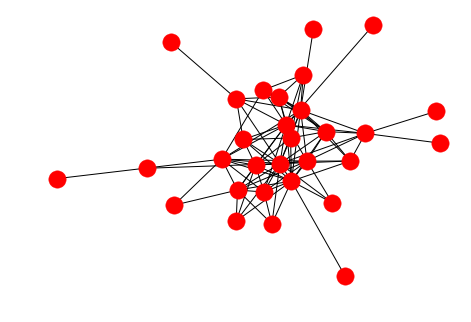

In [90]:
Hnet = Hxnet.get_interaction_networks(network_name='hummingbirds', data = data, 
                                      interactions = interactions, 
                                      location = output_path)   

In [91]:
import networkx as nx
nx.write_graphml(Hnet, output_path +'/'+ "hummingbirds_interaction.graphml")

In [92]:
from taggit import interactions as Hxnet

In [93]:
a = data.groupby(['ID', 'Sex', 'Age', 'Location', 'Species']).size().reset_index().rename(columns={0:'count'})

In [94]:
random = np.random.seed(0)
from fa2 import ForceAtlas2
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=0.4,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=5.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True,
                            )#**random

# Figure 10: (Manuscript has a figure generated using Gephi)

### Contact network of tagged Anna’s (pink nodes) and Allen’s hummingbirds (green nodes). The sex of the hummingbirds indicated by M for males and F for females. The size of the node is proportional to the degree of the interaction. Edges represent time spent together at the feeding station and the width of the edge width is proportional to the time spent together.

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2776.24it/s]


('BarnesHut Approximation', ' took ', '0.75', ' seconds')
('Repulsion forces', ' took ', '1.85', ' seconds')
('Gravitational forces', ' took ', '0.08', ' seconds')
('Attraction forces', ' took ', '0.32', ' seconds')
('AdjustSpeedAndApplyForces step', ' took ', '0.23', ' seconds')


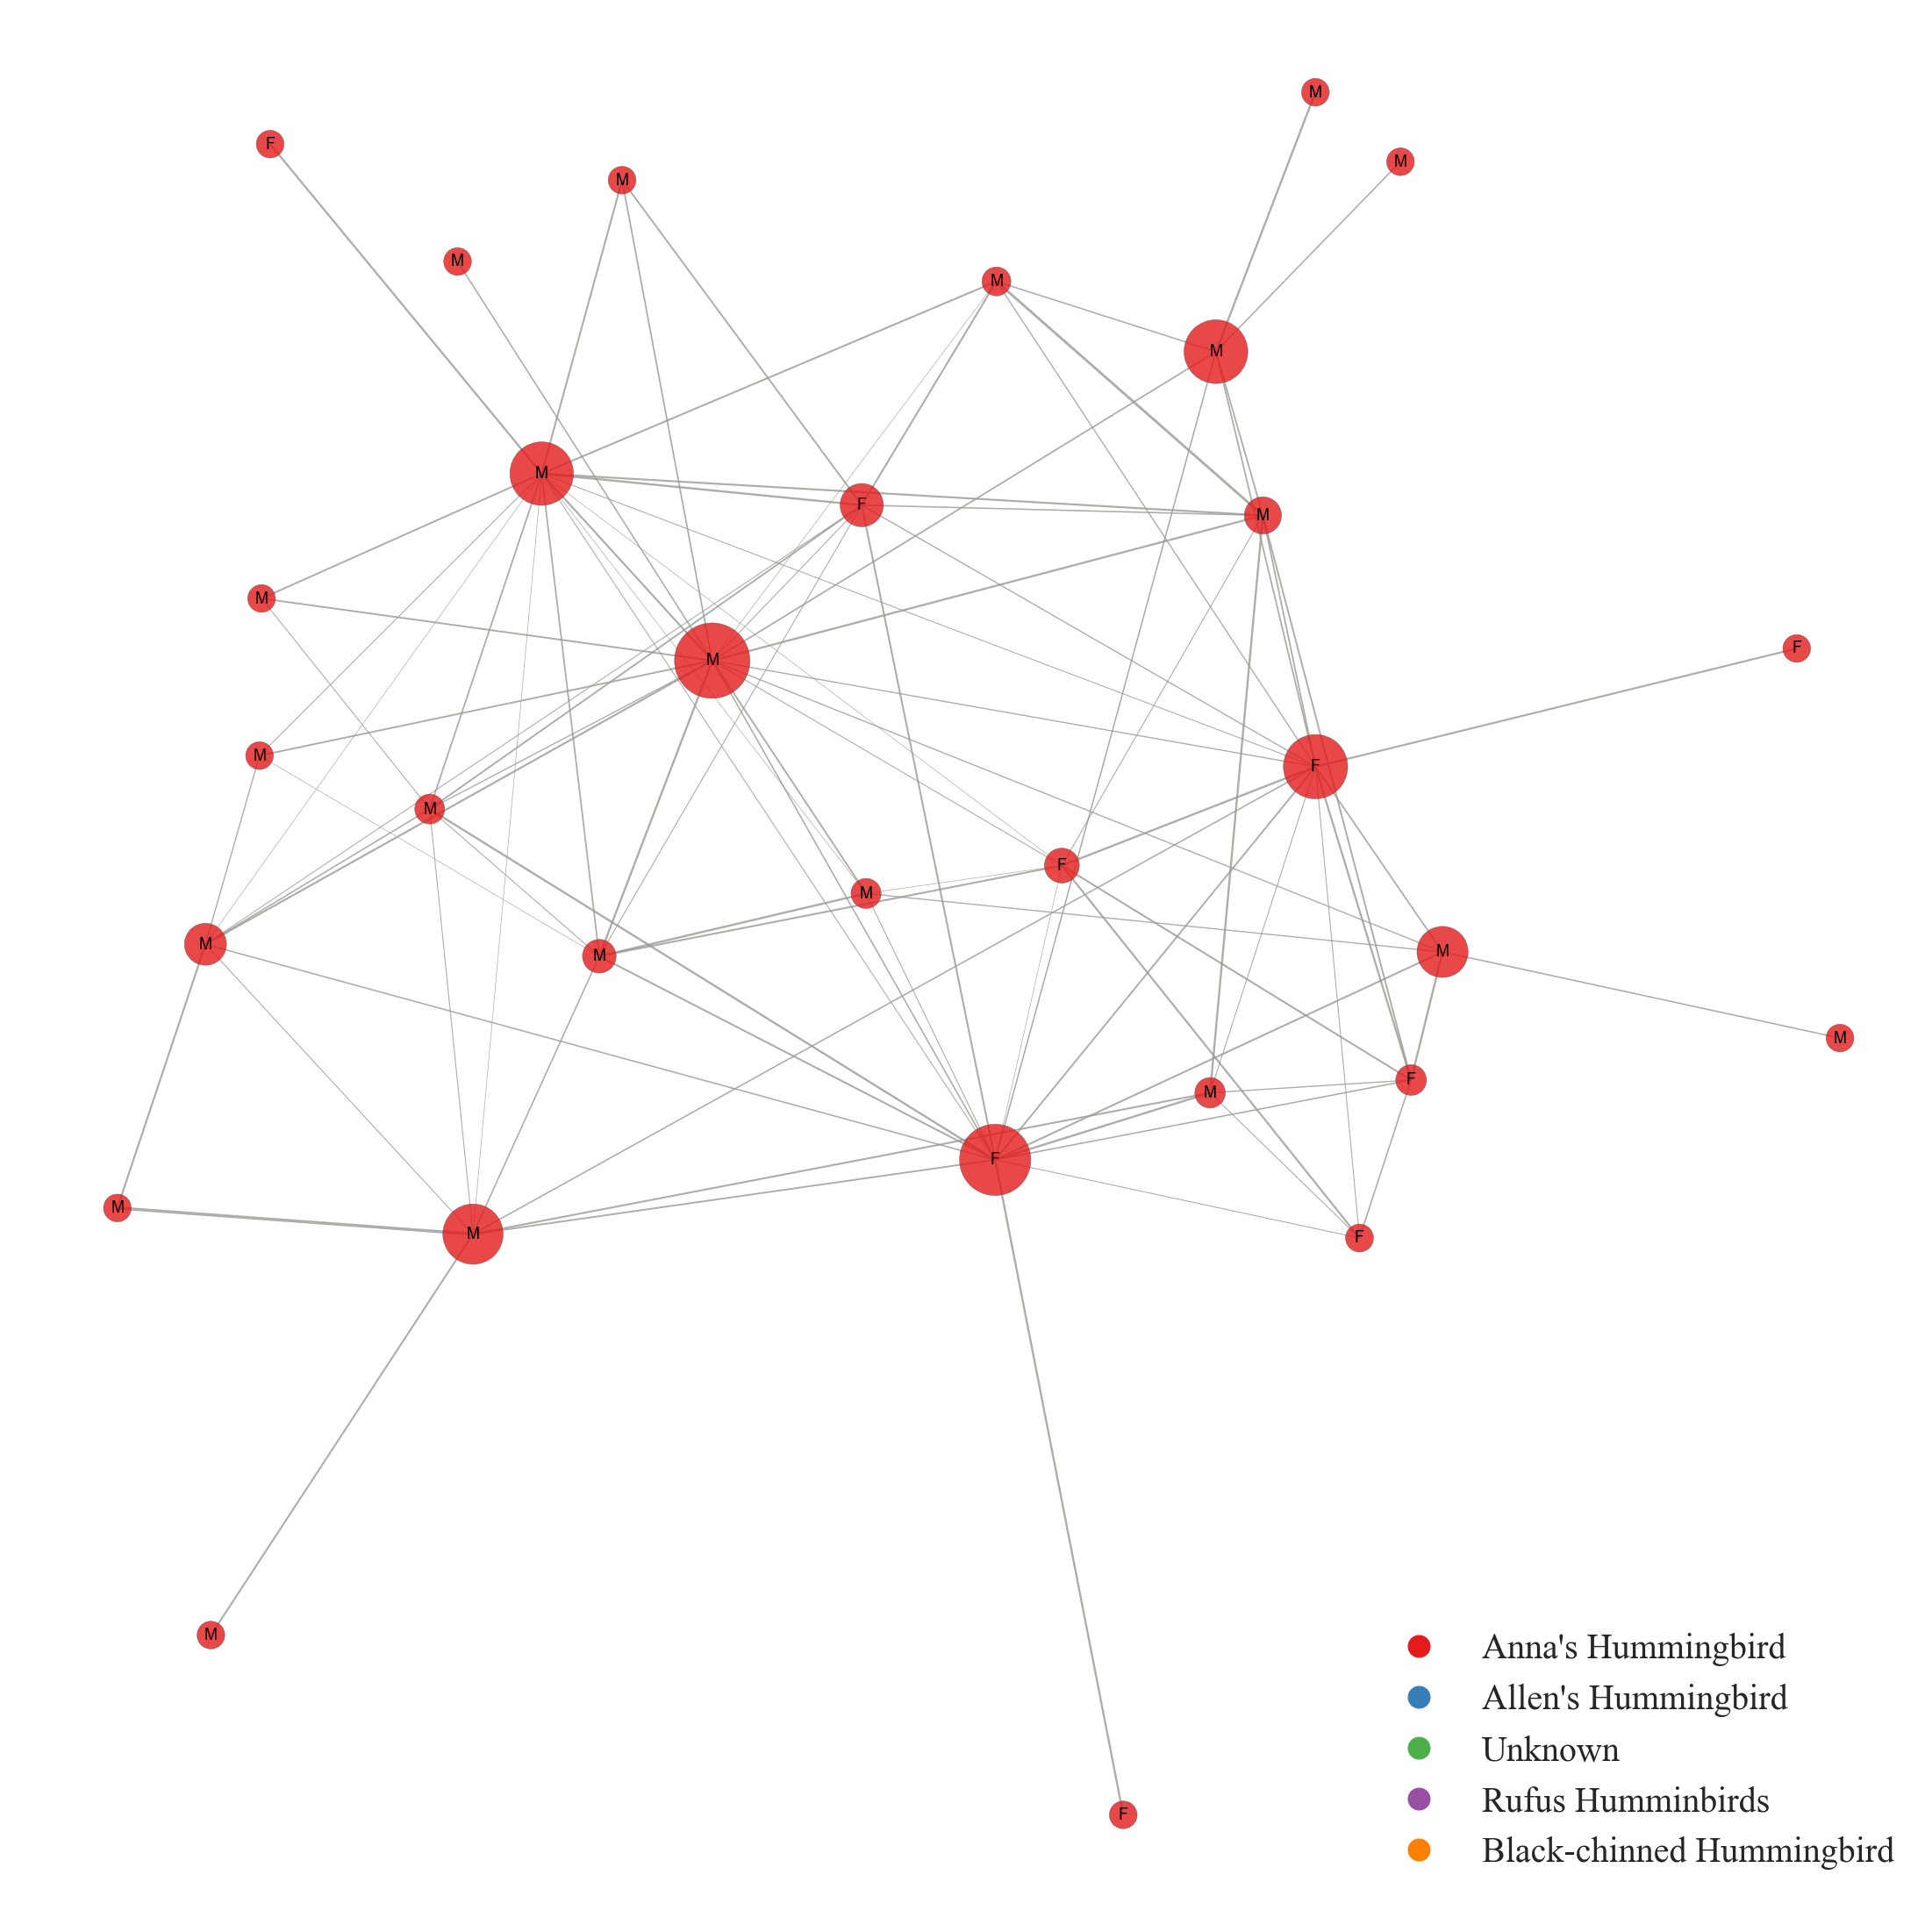

Wall time: 1min 21s


In [122]:
%%time
np.random.seed(1234)
color_map = {"ANHU":'#e41a1c', "ALHU":'#377eb8', '-':'#4daf4a' , 'RUHU':'#984ea3', 'BCHU':'#ff7f00'} 

plt.figure(figsize=(30,30))
options = {
    'edge_color': '#999994',
    'font_weight': 'regular',
    'label': True,
    'alpha': 0.8
}
colors = [color_map[Hnet.node[node]['Species']] for node in Hnet]
#sizes = [G.node[node]['nodesize']*10 for node in G]
w = nx.get_edge_attributes(Hnet,'weight').values()
w2 = [np.log(x -1) for x in w]
s = [1000+(10000*np.log2(x+1))+(np.log2(np.log2(x+1)+1)*10000) for x in nx.betweenness_centrality(Hnet,).values()]
l = nx.get_node_attributes(Hnet, 'Sex').values()
mapping=nx.get_node_attributes(Hnet, 'Sex')
#Hnet=nx.relabel_nodes(Hnet,mapping)
"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""

positions = forceatlas2.forceatlas2_networkx_layout(Hnet, pos=None, iterations=10000)
#positions  = nx.fruchterman_reingold_layout(Hnet)

nx.draw(Hnet, node_color=colors, node_size=s, pos=positions, width = w2,  **options)
nx.draw_networkx_labels(Hnet,positions,mapping,font_size=18)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']
texts = ["Anna's Hummingbird", "Allen's Hummingbird", 'Unknown', 'Rufus Humminbirds', 'Black-chinned Hummingbird']
patches = [plt.plot([],[], marker="o", ms=25, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
ax.legend(handles=patches, loc='best', ncol=1, 
          facecolor="plum", numpoints=1, fontsize=40 )#bbox_to_anchor=(0.5, 0.5)

plt.savefig(output_path+'/Network_diagram.png', dpi = dpi)
plt.savefig(output_path+'/Network_diagram.eps', format = 'eps', dpi = 300)
plt.show()

(array([ 6.,  8.,  0., 25., 13., 27., 19.,  0.,  1.,  1.]),
 array([0.        , 0.34965076, 0.69930151, 1.04895227, 1.39860302,
        1.74825378, 2.09790454, 2.44755529, 2.79720605, 3.14685681,
        3.49650756]),
 <a list of 10 Patch objects>)

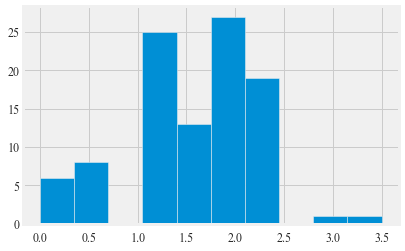

In [96]:
plt.hist(w2)

## Analysis for comparing degree distrbutions

# Figure S2:

### Results of permutation-based regression analysis to understand the effect of age and sex on the degree of in the observed network. Blue lines show the distribution of coefficients after 10,000 permutations. Red lines show original coefficients.

KeyError: 'Age[T.UNK]'

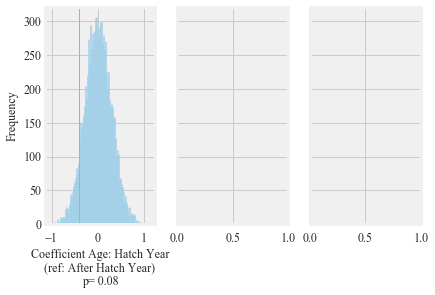

In [97]:
%%time
Hxnet.run_permutation_test(dependent='degree', network= Hnet, number_of_permutations = 10000, output_path = output_path)

# Figure S3:

### Results of permutation-based regression analysis to understand the effect of age and sex on the betweenness centrality of in the observed network. Blue lines show the distribution of coefficients after 10,000 permutations. Red lines show original coefficients.

KeyError: 'Age[T.UNK]'

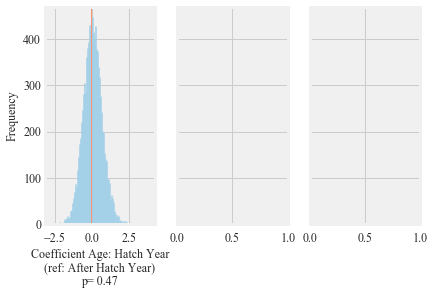

In [98]:
%%time
Hxnet.run_permutation_test(dependent='centrality', network= Hnet, number_of_permutations = 10000, output_path = output_path)

In [99]:
males = zip(*filter(lambda (n, d): d['Sex'] == 'M', Hnet.nodes(data=True)))[0]
females = zip(*filter(lambda (n, d): d['Sex'] == 'F', Hnet.nodes(data=True)))[0]
HY = zip(*filter(lambda (n, d): d['Age'] == 'HY', Hnet.nodes(data=True)))[0]
AHY = zip(*filter(lambda (n, d): d['Age'] == 'AHY', Hnet.nodes(data=True)))[0]

#####################################################################################
#####################################################################################

m_d = sorted(zip(*Hnet.degree(males))[1], reverse=True)
f_d = sorted(zip(*Hnet.degree(females))[1], reverse=True)
hy_d = sorted(zip(*Hnet.degree(HY))[1], reverse=True)
ahy_d = sorted(zip(*Hnet.degree(AHY))[1], reverse=True)

#####################################################################################
#####################################################################################

bc = nx.betweenness_centrality(Hnet)
males_bc = { m: bc[m] for m in males }
females_bc = { m: bc[m] for m in females }
AHY_bc = { m: bc[m] for m in AHY }
HY_bc = { m: bc[m] for m in HY }

In [100]:
degree = sorted(zip(*Hnet.degree(males))[1], reverse=True)

max(degree)

18

In [101]:
min(degree)

1

#### degree distbutions between males and females statistical comparison

In [102]:
stats.ks_2samp(m_d, f_d)

Ks_2sampResult(statistic=0.23809523809523814, pvalue=0.8124123149551177)

#### degree distbutions between hatch year and after hatch years statistical comparison

In [103]:
stats.ks_2samp(hy_d, ahy_d)

Ks_2sampResult(statistic=0.35714285714285715, pvalue=0.2361609364218674)

#### betweenness centrality males and females years statistical comparison

In [104]:
stats.ks_2samp(males_bc.values(), females_bc.values())

Ks_2sampResult(statistic=0.17460317460317465, pvalue=0.9813089366379063)

#### betweenness centrality hatch year and after hatch years statistical comparison

In [105]:
stats.ks_2samp(AHY_bc.values(), HY_bc.values())

Ks_2sampResult(statistic=0.2142857142857143, pvalue=0.8369157545133529)

# Figure 10:
### Contact network of tagged Anna’s (pink nodes) and Allen’s hummingbirds (green nodes). The sex of the hummingbirds indicated by M for males and F for females. The size of the node is proportional to the degree of the interaction. Edges represent time spent together at the feeding station and the width of the edge width is proportional to the time spent together.

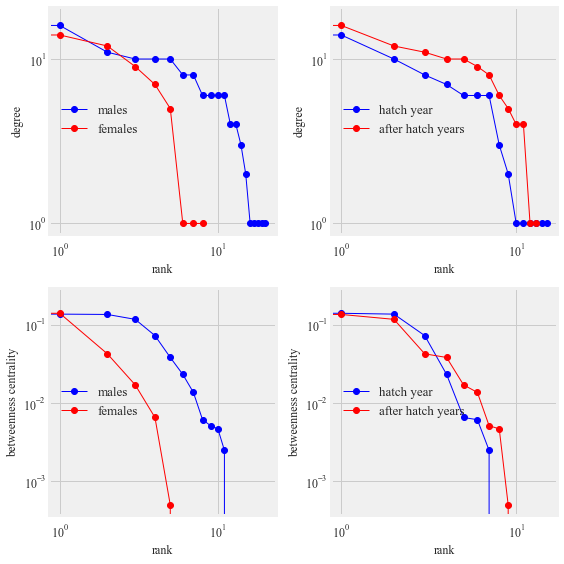

In [106]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (8,8))
ax1.loglog(m_d, 'b-', marker='o', label = 'males')
ax1.loglog(f_d, 'r-', marker='o', label = 'females')
ax1.legend()
ax1.set_ylabel("degree")
ax1.set_xlabel("rank")

ax2.loglog(hy_d, 'b-', marker='o', label = 'hatch year')
ax2.loglog(ahy_d, 'r-', marker='o', label = 'after hatch years')
ax2.legend()
ax2.set_ylabel("degree")
ax2.set_xlabel("rank")

ax3.loglog(sorted (males_bc.values(), reverse= True), 'b-', marker='o', label = 'males')
ax3.loglog(sorted (females_bc.values(), reverse= True), 'r-', marker='o', label = 'females')
ax3.legend()
ax3.set_ylabel("betweenness centrality")
ax3.set_xlabel("rank")

ax4.loglog(sorted (HY_bc.values(), reverse= True), 'b-', marker='o', label = 'hatch year')
ax4.loglog(sorted (AHY_bc.values(), reverse= True), 'r-', marker='o', label = 'after hatch years')
ax4.legend()
ax4.set_ylabel("betweenness centrality")
ax4.set_xlabel("rank")
plt.tight_layout()
plt.savefig(output_path+'/Figure 10.png', dpi= dpi)
plt.savefig(output_path+'/Figure 10.eps',format= 'eps', dpi= dpi)
plt.show()

## Table 6

In [108]:
i = list(pd.unique(interactions[['ID', 'second_bird']].values.ravel('K')))
interacted_birds = meta[meta['Tag Hex'].isin(i)]
inter = pd.pivot_table(data=interacted_birds, index='Species', columns=['Sex', 'Age'] , aggfunc= 'count', values='Tag Hex', fill_value=0, margins= True)
inter

Sex       F      M     All
Age     AHY HY AHY  HY    
Species                   
ANHU      5  4   9  12  30
All       5  4   9  12  30

In [ ]:
pd.pivot_table(data=interacted_birds, index='Species', columns='Sex' , aggfunc= 'count', values='Tag Hex', fill_value=0, margins= True)

### Types of interactions

In [109]:
m2 = meta[['Tag Hex', 'Species', 'Age', 'Sex']]
m2.columns = ['second_bird', 'Species2', 'Age2', 'Sex2']
i2 = pd.merge(interactions, m2, on='second_bird', how='left')
def returnTypeInt (c):
    if [(c.Sex == 'M') & (c.Sex2 == 'M')]:
        return 'MM'
    elif [(c.Sex == 'M') & (c.Sex2 == 'F')]:
        return 'MF'
    elif [(c.Sex == 'F') & (c.Sex2 == 'M')]:
        return 'MF'
    elif [(c.Sex == 'F') & (c.Sex2 == 'F')]:
        return 'FF'
    else:
        return 'Problem'

In [110]:
conditions = [
    (i2['Sex'] == 'M') & (i2['Sex2'] == 'M'),
    (i2['Sex'] == 'M') & (i2['Sex2'] == 'F'),
    (i2['Sex'] == 'F') & (i2['Sex2'] == 'M'),
    (i2['Sex'] == 'F') & (i2['Sex2'] == 'F')
]
choices = ['MM', 'MF', 'MF', 'FF']
i2['Type'] = np.select(conditions, choices, default='MM')


conditions2 = [
    (i2['overlap'] <= 0),
    (i2['overlap'] > 0)
]#(i2['overlap'] == 0)
choices = ['short_interactions',  'long_interactions'] #'medium_interactions',
i2['DurationType'] = np.select(conditions2, choices, default='short_interaction')

#i2['Type'] = i2.apply(returnTypeInt, axis=1)
i2['Type'].value_counts()

MM    611
MF    174
FF    115
Name: Type, dtype: int64

In [ ]:
#i2['Type'] = i2.apply(returnTypeInt, axis=1)
i2['Type'].value_counts()

In [111]:
i2['DurationType'].value_counts()

short_interactions    877
long_interactions      23
Name: DurationType, dtype: int64

In [112]:
inter_pv = pd.pivot_table(columns='DurationType', index='Type',data=i2, fill_value=0, aggfunc='count', values='ID')
inter_pv

DurationType  long_interactions  short_interactions
Type                                               
FF                            7                 108
MF                            3                 171
MM                           13                 598

In [113]:
i2.Age2.unique()

array([u'AHY', u'HY'], dtype=object)

In [114]:
conditions3 = [
    (i2['Age'] == 'HY') & (i2['Age2'] == 'HY'),
    (i2['Age'] == 'HY') & (i2['Age2'] == 'AHY'),
    (i2['Age'] == 'HY') & (i2['Age2'] == 'UNK'),
    
    (i2['Age'] == 'AHY') & (i2['Age2'] == 'HY'),
    (i2['Age'] == 'AHY') & (i2['Age2'] == 'AHY'),
    (i2['Age'] == 'AHY') & (i2['Age2'] == 'UNK'),
    
    (i2['Age'] == 'UNK') & (i2['Age2'] == 'HY'),
    (i2['Age'] == 'UNK') & (i2['Age2'] == 'AHY'),
    (i2['Age'] == 'UNK') & (i2['Age2'] == 'UNK'),
    ]
choices = ['HyHy', 'HyAHy', 'HyUNK', 'HyAHy', 'AHyAHy', 'AHyUNK', 'HyUNK', 'AHyUNK', 'UNKUNK']
i2['TypeAge'] = np.select(conditions3, choices, default='UNKUNK')

In [115]:
i2['TypeAge'].value_counts()

HyHy      431
HyAHy     253
AHyAHy    216
Name: TypeAge, dtype: int64

In [116]:
age_pv = pd.pivot_table(columns='DurationType', index='TypeAge',data=i2, fill_value=0, aggfunc='count', values='ID')
age_pv

DurationType  long_interactions  short_interactions
TypeAge                                            
AHyAHy                        2                 214
HyAHy                         8                 245
HyHy                         13                 418

In [117]:
i2.set_index(pd.DatetimeIndex(i2['visit_start']), inplace= True)

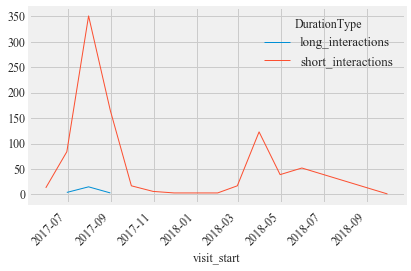

In [118]:
i2.groupby([ pd.Grouper(freq='M'), 'DurationType'])['ID'].count().unstack('DurationType').plot(kind="line", rot =45, stacked=False)
plt.show()

In [119]:
i2.groupby([ pd.Grouper(freq='M'), 'DurationType'])['ID'].count().unstack('DurationType')

DurationType  long_interactions  short_interactions
visit_start                                        
2017-05-31                  NaN                13.0
2017-06-30                  4.0                84.0
2017-07-31                 15.0               351.0
2017-08-31                  3.0               165.0
2017-09-30                  NaN                17.0
2017-10-31                  NaN                 6.0
2017-11-30                  NaN                 3.0
2017-12-31                  NaN                 3.0
2018-01-31                  NaN                 3.0
2018-02-28                  NaN                17.0
2018-03-31                  1.0               123.0
2018-04-30                  NaN                39.0
2018-05-31                  NaN                52.0
2018-09-30                  NaN                 1.0

In [120]:
i2['visit_start'] = pd.to_datetime(i2['visit_start'])
i2.set_index(pd.DatetimeIndex(i2['visit_start']), inplace= True)
multi_index = pd.MultiIndex.from_product([pd.date_range('2016-9-22', i2.visit_start.max().date(),freq='1H'), i2['DurationType'].unique()], names=['Date', 'DurationType'])
a = i2.groupby([ pd.Grouper(freq='1H'), 'DurationType'])['ID'].count().reindex(multi_index, fill_value=0).unstack('DurationType').reset_index()#.plot(kind="bar", rot =0, stacked=True).res
a['h'] = pd.to_datetime(a['Date'], format= '%H:%M:%S' ).dt.time
agg_funcs = {'long_interactions':[np.mean, 'sem'], 'short_interactions':[np.mean, 'sem']}
a = a.groupby(a.h).agg(agg_funcs).reset_index()
a.columns = a.columns.droplevel(0)
a.columns = ['hour', 'mean_long', 'sem_long', 'mean_short', 'sem_short',]
#a['hour'] = pd.to_datetime(a['hour'])
a = a.set_index(a['hour'])
a

hour  mean_long  sem_long  mean_short  sem_short
hour                                                          
00:00:00  00:00:00   0.000000  0.000000    0.000000   0.000000
01:00:00  01:00:00   0.000000  0.000000    0.000000   0.000000
02:00:00  02:00:00   0.000000  0.000000    0.000000   0.000000
03:00:00  03:00:00   0.000000  0.000000    0.000000   0.000000
04:00:00  04:00:00   0.002801  0.001979    0.028011   0.008105
05:00:00  05:00:00   0.002801  0.001979    0.131653   0.025829
06:00:00  06:00:00   0.000000  0.000000    0.133053   0.027762
07:00:00  07:00:00   0.000000  0.000000    0.072829   0.016947
08:00:00  08:00:00   0.005602  0.003427    0.086835   0.018836
09:00:00  09:00:00   0.004202  0.002422    0.044818   0.008927
10:00:00  10:00:00   0.001401  0.001401    0.070028   0.015257
11:00:00  11:00:00   0.001401  0.001401    0.060224   0.012877
12:00:00  12:00:00   0.001401  0.001401    0.050420   0.011573
13:00:00  13:00:00   0.001401  0.001401    0.029412   0.008218
14:00:00  14:00:00   0.000000  0.000000    0.049020   0.011666
15:00:00  15:00:00   0.000000  0.000000    0.039216   0.009392
16:00:00  16:00:00   0.001401  0.001401    0.068627   0.012818
17:00:00  17:00:00   0.002801  0.001979    0.089636   0.016599
18:00:00  18:00:00   0.004202  0.002422    0.138655   0.026786
19:00:00  19:00:00   0.002801  0.001979    0.109244   0.021231
20:00:00  20:00:00   0.000000  0.000000    0.008403   0.008403
21:00:00  21:00:00   0.000000  0.000000    0.008403   0.007140
22:00:00  22:00:00   0.000000  0.000000    0.007003   0.004196
23:00:00  23:00:00   0.000000  0.000000    0.001401   0.001401

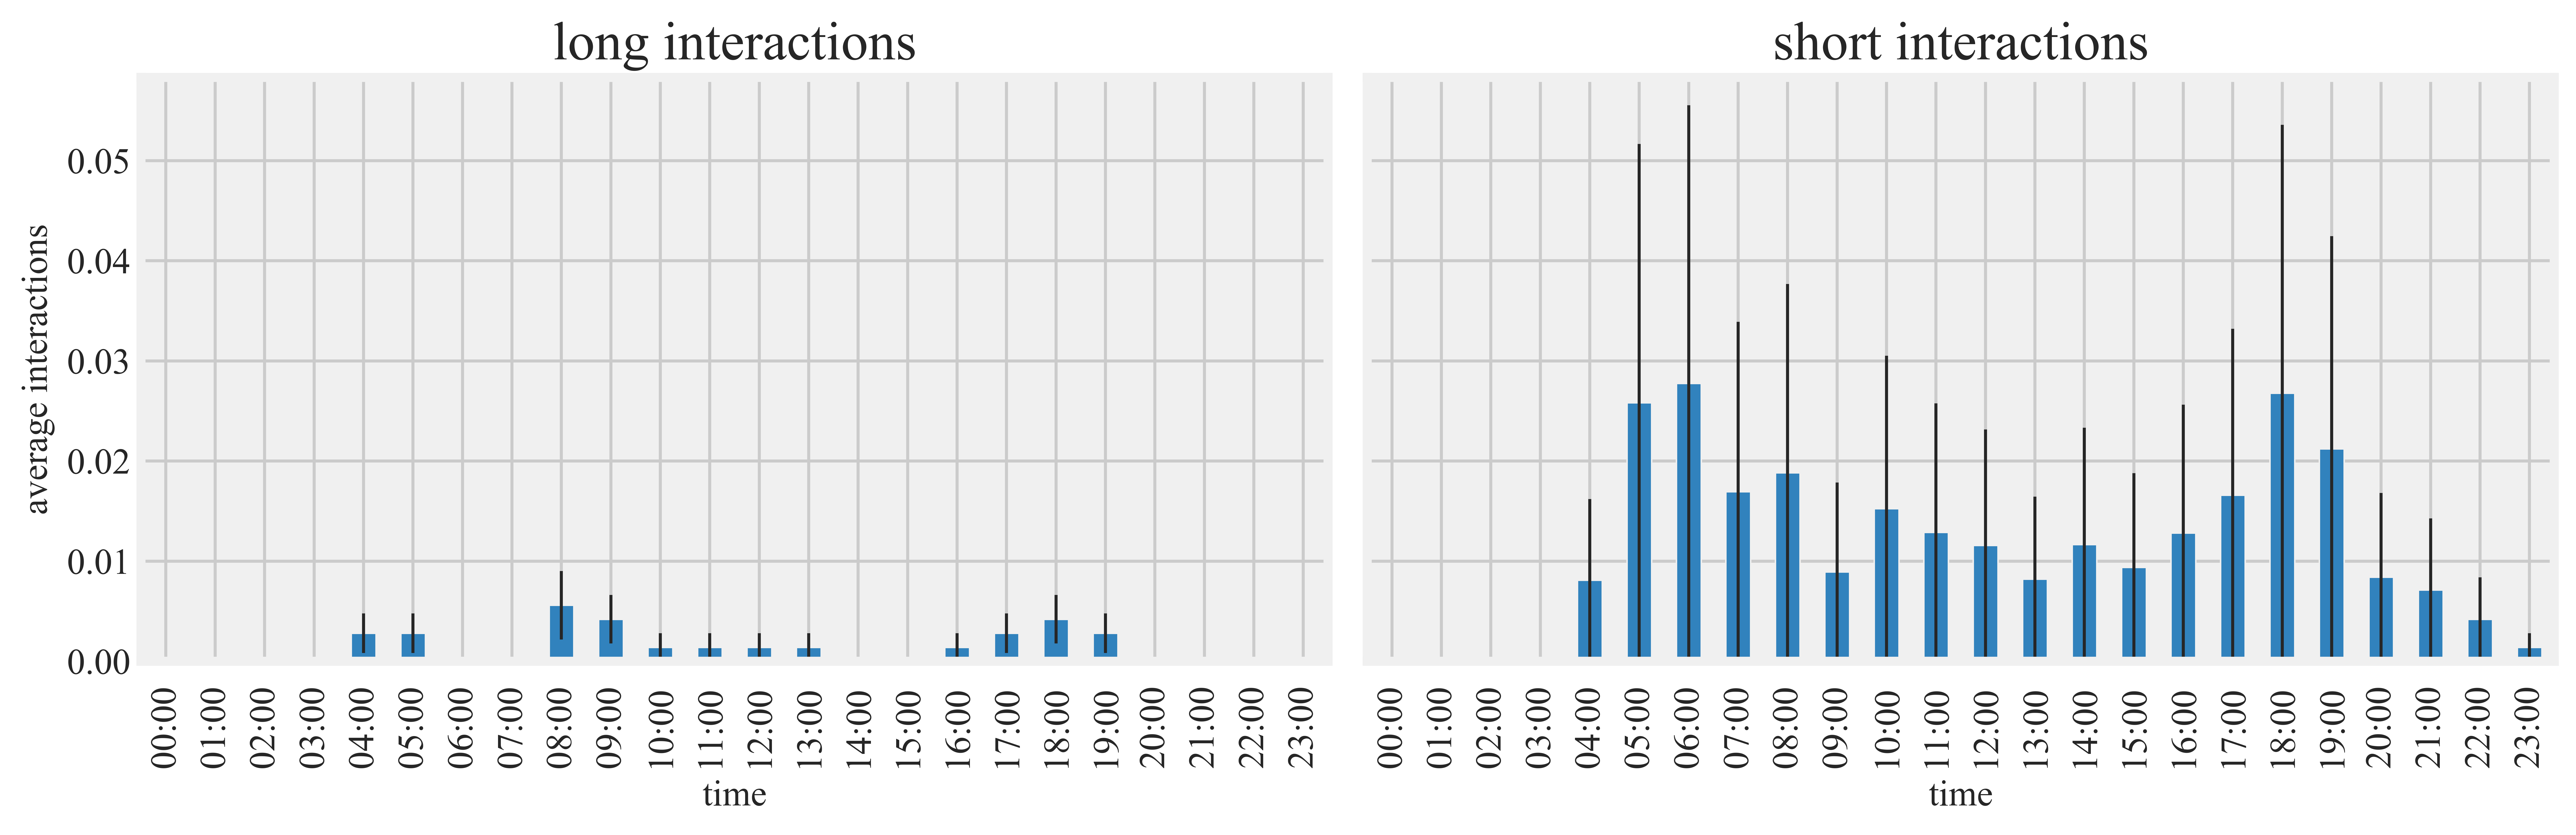

In [121]:
plt.rcParams['font.family'] = 'Times New Roman'
f, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12,4), dpi=dpi, sharey=True, )
a.plot(y='mean_long', kind = 'bar', yerr='sem_long', color='#3182bd',ax= ax1, legend=False)
a.plot(y='sem_short', kind = 'bar', yerr='sem_short', color='#3182bd',ax= ax2, legend=False)
yaxis_text = 'average interactions'
ax1.set_ylabel(yaxis_text)
ax2.set_ylabel(yaxis_text)

ax1.set_title('long interactions')
ax2.set_title('short interactions')

ticks = [ x.strftime('%H:%M') for x in a.index.values ]
ax1.set_xticklabels(ticks)
ax2.set_xticklabels(ticks)

ax1.set_xlabel('time')
ax2.set_xlabel('time')
plt.tight_layout()
#plt.savefig(output_path+'/Interactions_daily_variation.png', dpi=600, figsize = (6,4))
plt.show()